## Setup

In [1]:
import sys
import os
madminer_src_path = "/home/shomiller/madminer"
sys.path.append(madminer_src_path)

from __future__ import absolute_import, division, print_function, unicode_literals
import logging

import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from madminer.fisherinformation import FisherInformation
from madminer.fisherinformation import project_information, profile_information

from madminer.sampling import SampleAugmenter

from madminer.plotting import plot_distribution_of_information

from pandas import DataFrame

import madminer.__version__
print( 'MadMiner version: {}'.format(madminer.__version__) )

MadMiner version: 0.4.10


In [2]:
# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

Formatting Options for Plotting

In [3]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.style'] = 'normal'
mpl.rcParams['font.serif'] = 'Times New Roman'

mpl.rcParams['savefig.bbox'] = 'tight'

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.formatter.use_mathtext'] = True

### Data Files:

Saving the paths for all our lhe data files, for easy use later on.

Note, lhedata are saved in the format:
`data/{channel}_lhedata_{observables}.h5`
while the `SALLY` models are saved in:
`models/sally_ensemble_{channel}_{observables}/`

here `channel` can be e.g, `wph_mu_wbkgs` or `wmh_e_wbkgs` (or take out the backgrounds for the background free runs), while `observables` can be `full`, `met`, `ptw` or `2d`

#### Signal + Backgrounds

In [4]:
lhedatafile_wph_mu_wbkgs_met = 'data/met/wph_mu_wbkgs_lhedata_met.h5'
lhedatafile_wph_e_wbkgs_met = 'data/met/wph_e_wbkgs_lhedata_met.h5'
lhedatafile_wmh_mu_wbkgs_met = 'data/met/wmh_mu_wbkgs_lhedata_met.h5'
lhedatafile_wmh_e_wbkgs_met = 'data/met/wmh_e_wbkgs_lhedata_met.h5'

#### Signal Only

In [5]:
lhedatafile_wph_mu_met = 'data/met/signal/wph_mu_smeftsim_lhedata_met.h5'
lhedatafile_wph_e_met = 'data/met/signal/wph_e_smeftsim_lhedata_met.h5'
lhedatafile_wmh_mu_met = 'data/met/signal/wmh_mu_smeftsim_lhedata_met.h5'
lhedatafile_wmh_e_met = 'data/met/signal/wmh_e_smeftsim_lhedata_met.h5'

Set up Fisher Info objects to compute histograms of F.I. in each file.

#### F.I. in MET (Signal + Background)

In [6]:
fisher_wph_mu_wbkgs_met = FisherInformation(lhedatafile_wph_mu_wbkgs_met, include_nuisance_parameters=False)

fisher_wph_e_wbkgs_met = FisherInformation(lhedatafile_wph_e_wbkgs_met, include_nuisance_parameters=False)

fisher_wmh_mu_wbkgs_met = FisherInformation(lhedatafile_wmh_mu_wbkgs_met, include_nuisance_parameters=False)

fisher_wmh_e_wbkgs_met = FisherInformation(lhedatafile_wmh_e_wbkgs_met, include_nuisance_parameters=False)

20:26 madminer.analysis    INFO    Loading data from data/met/wph_mu_wbkgs_lhedata_met.h5
20:26 madminer.analysis    INFO    Found 4 parameters
20:26 madminer.analysis    INFO    Did not find nuisance parameters
20:26 madminer.analysis    INFO    Found 15 benchmarks, of which 15 physical
20:26 madminer.analysis    INFO    Found 48 observables
20:26 madminer.analysis    INFO    Found 5000000 events
20:26 madminer.analysis    INFO      1000000 signal events sampled from benchmark sm
20:26 madminer.analysis    INFO      4000000 background events
20:26 madminer.analysis    INFO    Found morphing setup with 15 components
20:26 madminer.analysis    INFO    Did not find nuisance morphing setup
20:26 madminer.analysis    INFO    Loading data from data/met/wph_e_wbkgs_lhedata_met.h5
20:26 madminer.analysis    INFO    Found 4 parameters
20:26 madminer.analysis    INFO    Did not find nuisance parameters
20:26 madminer.analysis    INFO    Found 15 benchmarks, of which 15 physical
20:26 madminer.a

#### F.I. in MET info (Signal Only)

In [7]:
fisher_wph_mu_met = FisherInformation(lhedatafile_wph_mu_met, include_nuisance_parameters=True)

fisher_wph_e_met = FisherInformation(lhedatafile_wph_e_met, include_nuisance_parameters=True)

fisher_wmh_mu_met = FisherInformation(lhedatafile_wmh_mu_met, include_nuisance_parameters=True)

fisher_wmh_e_met = FisherInformation(lhedatafile_wmh_e_met, include_nuisance_parameters=True)

20:26 madminer.analysis    INFO    Loading data from data/met/signal/wph_mu_smeftsim_lhedata_met.h5
20:26 madminer.analysis    INFO    Found 4 parameters
20:26 madminer.analysis    INFO    Found 33 nuisance parameters
20:26 madminer.analysis    INFO    Found 54 benchmarks, of which 15 physical
20:26 madminer.analysis    INFO    Found 48 observables
20:26 madminer.analysis    INFO    Found 1000000 events
20:26 madminer.analysis    INFO      1000000 signal events sampled from benchmark sm
20:26 madminer.analysis    INFO    Found morphing setup with 15 components
20:26 madminer.analysis    INFO    Found nuisance morphing setup
20:26 madminer.analysis    INFO    Loading data from data/met/signal/wph_e_smeftsim_lhedata_met.h5
20:26 madminer.analysis    INFO    Found 4 parameters
20:26 madminer.analysis    INFO    Found 33 nuisance parameters
20:26 madminer.analysis    INFO    Found 54 benchmarks, of which 15 physical
20:26 madminer.analysis    INFO    Found 48 observables
20:26 madminer.ana

## 1E. Rotating the Information

The coefficients $c_{H\square}$ and $c_{HD}$ always enter in the combination $(c_{H\square} - \frac{1}{4}c_{HD})$. This implies there is an inherent flat direction, along the axis $c_{H\square} + 4 c_{HD}$. 

Before analyzing the information, we want to rotate to a basis where this flat direction is manifest. Then we can profile (or project -- the results should be approximately the same) out the flat direction easily and have a $3 \times 3$ fisher information matrix to work with in the basis $c_{H\square} - \frac{1}{4} c_{HD}$, $c_{HW}$, and $c_{Hq}^{(3)}$.

### Function for Rotating:

Function for rotating the fisher information, including the covariance matrix.

By default, it takes the rotation angle to be `np.arctan(4)`, which rotates out the flat direction and leaves the direction $c_{H\square} - \frac{1}{4} c_{HD}$

In [8]:
def rotate(
    fisher_info, covariance=None, include_flat_direction=False, include_nuisance_params=False, rotation_angle=None, axis1=0, axis2=1,
):

    # specify an angle (default = arctan(4), which rotates out the flat direction in cHD and cHbox)
    if rotation_angle == None:
        this_angle = np.arctan(4)
    else: 
        this_angle = rotation_angle
    
    #define the rotation matrix
    dimension = len(fisher_info)
    this_rotation_matrix = np.zeros((dimension, dimension))
    np.fill_diagonal(this_rotation_matrix, 1)
    this_rotation_matrix[axis1,axis1] = np.cos(this_angle)
    this_rotation_matrix[axis1,axis2] = -1.*np.sin(this_angle)
    this_rotation_matrix[axis2,axis1] =  1.*np.sin(this_angle)
    this_rotation_matrix[axis2,axis2] = np.cos(this_angle)
    
    #get the rotated fisher information
    rotated_fisher_info = np.einsum('ki,lj,kl->ij', this_rotation_matrix, this_rotation_matrix, fisher_info)
    
    #get the rotated covariance of the fisher information
    if covariance is None:
        rotated_covariance = covariance 
    else:
        rotated_covariance = np.einsum('mi,nj,ok,pl,mnop->ijkl', 
                                this_rotation_matrix, this_rotation_matrix, this_rotation_matrix, this_rotation_matrix, covariance)

    # If not desired, project out the nuisance parameters
    if not include_nuisance_params:
        if covariance is None:
            rotated_fisher_info = project_information(rotated_fisher_info, [0,1,2,3])
        else:
            rotated_fisher_info, rotated_covariance = project_information(rotated_fisher_info, [0,1,2,3], covariance=rotated_covariance)
        
    #return either the three physical directions or include the flat direction
    if include_flat_direction:
        if covariance is None:
            return rotated_fisher_info
        else:
            return rotated_fisher_info, rotated_covariance
    else:
        return project_information(rotated_fisher_info, np.arange(1,len(rotated_fisher_info)), covariance=rotated_covariance)

# 4. Distributions of Information

## 4A. Computing the Binned Information

### Paths to Model Files

In [9]:
model_path_wph_mu = 'models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met'
model_path_wph_e = 'models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met'
model_path_wmh_mu = 'models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met'
model_path_wmh_e = 'models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met'

### $p_{T,W}$

In [13]:
bins_histo_wph_mu_ptw, w_in_histo_wph_mu_ptw, fi_histo_rate_wph_mu_ptw, fi_histo_wph_mu_ptw = fisher_wph_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file=model_path_wph_mu,
)

16:53 madminer.ml          INFO    Found score ensemble with 5 estimators
16:53 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
16:53 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
16:53 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
16:53 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
16:53 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
17:00 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
17:00 madminer.ml          INFO    Starting score evaluation
17:00 madminer.ml          INFO    Starting score evaluation
17:00 madminer.ml          INFO    Starting score evaluation
17:00 madminer.ml          INFO    St

In [14]:
bins_histo_wph_e_ptw, w_in_histo_wph_e_ptw, fi_histo_rate_wph_e_ptw, fi_histo_wph_e_ptw = fisher_wph_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file=model_path_wph_e,
)

17:11 madminer.ml          INFO    Found score ensemble with 5 estimators
17:11 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_0
17:11 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_1
17:11 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_2
17:11 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_3
17:11 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_4
17:17 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
17:17 madminer.ml          INFO    Starting score evaluation
17:17 madminer.ml          INFO    Starting score evaluation
17:17 madminer.ml          INFO    Starting score evaluation
17:17 madminer.ml          INFO    Startin

In [15]:
bins_histo_wmh_mu_ptw, w_in_histo_wmh_mu_ptw, fi_histo_rate_wmh_mu_ptw, fi_histo_wmh_mu_ptw = fisher_wmh_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file=model_path_wmh_mu,
)

17:20 madminer.ml          INFO    Found score ensemble with 5 estimators
17:20 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
17:20 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
17:20 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
17:20 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
17:20 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
17:25 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
17:25 madminer.ml          INFO    Starting score evaluation
17:25 madminer.ml          INFO    Starting score evaluation
17:25 madminer.ml          INFO    Starting score evaluation
17:25 madminer.ml          INFO    St

In [16]:
bins_histo_wmh_e_ptw, w_in_histo_wmh_e_ptw, fi_histo_rate_wmh_e_ptw, fi_histo_wmh_e_ptw = fisher_wmh_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file=model_path_wmh_e,
)

17:27 madminer.ml          INFO    Found score ensemble with 5 estimators
17:27 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_0
17:27 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_1
17:27 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_2
17:27 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_3
17:27 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_4
17:33 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
17:33 madminer.ml          INFO    Starting score evaluation
17:33 madminer.ml          INFO    Starting score evaluation
17:33 madminer.ml          INFO    Starting score evaluation
17:33 madminer.ml          INFO    Startin

In [17]:
fi_histo_ptw_outfile = './fisher_info/dists/fi_histo_ptw.npz'

fi_histo_ptw_list = [
    bins_histo_wph_mu_ptw,
    w_in_histo_wph_mu_ptw,
    fi_histo_rate_wph_mu_ptw,
    fi_histo_wph_mu_ptw,
    bins_histo_wph_e_ptw,
    w_in_histo_wph_e_ptw,
    fi_histo_rate_wph_e_ptw,
    fi_histo_wph_e_ptw,
    bins_histo_wmh_mu_ptw,
    w_in_histo_wmh_mu_ptw,
    fi_histo_rate_wmh_mu_ptw,
    fi_histo_wmh_mu_ptw,
    bins_histo_wmh_e_ptw,
    w_in_histo_wmh_e_ptw,
    fi_histo_rate_wmh_e_ptw,
    fi_histo_wmh_e_ptw,
]

In [18]:
np.savez(fi_histo_ptw_outfile, fi_histo_ptw_list, allow_pickle=False)

In [19]:
fi_histo_rate_ptw = [ fi_histo_rate_wph_mu_ptw[i]
                     + fi_histo_rate_wph_e_ptw[i] 
                     + fi_histo_rate_wmh_mu_ptw[i] 
                     + fi_histo_rate_wmh_e_ptw[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_ptw)) ]

fi_histo_ptw = [ fi_histo_wph_mu_ptw[i]
                     + fi_histo_wph_e_ptw[i] 
                     + fi_histo_wmh_mu_ptw[i] 
                     + fi_histo_wmh_e_ptw[i] 
                     for i in range(0, len(fi_histo_wph_mu_ptw)) ]

fi_histo_rate_ptw_rot = [ rotate(fi_histo_rate_ptw[i]) for i in range(0, len(fi_histo_rate_ptw)) ]
fi_histo_ptw_rot = [ rotate(fi_histo_ptw[i]) for i in range(0, len(fi_histo_ptw)) ]

### $m_{T,\mathrm{tot}}$

In [29]:
bins_histo_wph_mu_mttot, w_in_histo_wph_mu_mttot, fi_histo_rate_wph_mu_mttot, fi_histo_wph_mu_mttot = fisher_wph_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='mt_tot',
    nbins=20,
    histrange=(200,2200),
    model_file=model_path_wph_mu,
)

17:39 madminer.ml          INFO    Found score ensemble with 5 estimators
17:39 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
17:39 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
17:39 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
17:39 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
17:39 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
17:45 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
17:45 madminer.ml          INFO    Starting score evaluation
17:45 madminer.ml          INFO    Starting score evaluation
17:45 madminer.ml          INFO    Starting score evaluation
17:45 madminer.ml          INFO    St

In [30]:
bins_histo_wph_e_mttot, w_in_histo_wph_e_mttot, fi_histo_rate_wph_e_mttot, fi_histo_wph_e_mttot = fisher_wph_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='mt_tot',
    nbins=20,
    histrange=(200,2200),
    model_file=model_path_wph_e,
)

17:47 madminer.ml          INFO    Found score ensemble with 5 estimators
17:47 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_0
17:47 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_1
17:47 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_2
17:47 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_3
17:47 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_4
17:53 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
17:53 madminer.ml          INFO    Starting score evaluation
17:53 madminer.ml          INFO    Starting score evaluation
17:53 madminer.ml          INFO    Starting score evaluation
17:53 madminer.ml          INFO    Startin

In [31]:
bins_histo_wmh_mu_mttot, w_in_histo_wmh_mu_mttot, fi_histo_rate_wmh_mu_mttot, fi_histo_wmh_mu_mttot = fisher_wmh_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='mt_tot',
    nbins=20,
    histrange=(200,2200),
    model_file=model_path_wmh_mu,
)

17:55 madminer.ml          INFO    Found score ensemble with 5 estimators
17:55 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
17:55 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
17:55 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
17:55 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
17:55 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
18:01 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
18:01 madminer.ml          INFO    Starting score evaluation
18:01 madminer.ml          INFO    Starting score evaluation
18:01 madminer.ml          INFO    Starting score evaluation
18:01 madminer.ml          INFO    St

In [32]:
bins_histo_wmh_e_mttot, w_in_histo_wmh_e_mttot, fi_histo_rate_wmh_e_mttot, fi_histo_wmh_e_mttot = fisher_wmh_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='mt_tot',
    nbins=20,
    histrange=(200,2200),
    model_file=model_path_wmh_e,
)

18:03 madminer.ml          INFO    Found score ensemble with 5 estimators
18:03 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_0
18:03 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_1
18:03 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_2
18:03 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_3
18:03 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_4
18:12 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
18:12 madminer.ml          INFO    Starting score evaluation
18:13 madminer.ml          INFO    Starting score evaluation
18:13 madminer.ml          INFO    Starting score evaluation
18:13 madminer.ml          INFO    Startin

In [33]:
fi_histo_mttot_outfile = './fisher_info/dists/fi_histo_mttot.npz'

fi_histo_mttot_list = [
    bins_histo_wph_mu_mttot,
    w_in_histo_wph_mu_mttot,
    fi_histo_rate_wph_mu_mttot,
    fi_histo_wph_mu_mttot,
    bins_histo_wph_e_mttot,
    w_in_histo_wph_e_mttot,
    fi_histo_rate_wph_e_mttot,
    fi_histo_wph_e_mttot,
    bins_histo_wmh_mu_mttot,
    w_in_histo_wmh_mu_mttot,
    fi_histo_rate_wmh_mu_mttot,
    fi_histo_wmh_mu_mttot,
    bins_histo_wmh_e_mttot,
    w_in_histo_wmh_e_mttot,
    fi_histo_rate_wmh_e_mttot,
    fi_histo_wmh_e_mttot,
]

In [34]:
np.savez(fi_histo_mttot_outfile, fi_histo_mttot_list, allow_pickle=False)

In [35]:
fi_histo_rate_mttot = [ fi_histo_rate_wph_mu_mttot[i]
                     + fi_histo_rate_wph_e_mttot[i] 
                     + fi_histo_rate_wmh_mu_mttot[i] 
                     + fi_histo_rate_wmh_e_mttot[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_mttot)) ]

fi_histo_mttot = [ fi_histo_wph_mu_mttot[i]
                     + fi_histo_wph_e_mttot[i] 
                     + fi_histo_wmh_mu_mttot[i] 
                     + fi_histo_wmh_e_mttot[i] 
                     for i in range(0, len(fi_histo_wph_mu_mttot)) ]

fi_histo_rate_mttot_rot = [ rotate(fi_histo_rate_mttot[i]) for i in range(0, len(fi_histo_rate_mttot)) ]
fi_histo_mttot_rot = [ rotate(fi_histo_mttot[i]) for i in range(0, len(fi_histo_mttot)) ]

### $m_{T,W}$

In [88]:
bins_histo_wph_mu_mtlv, w_in_histo_wph_mu_mtlv, fi_histo_rate_wph_mu_mtlv, fi_histo_wph_mu_mtlv = fisher_wph_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='mt_lv',
    nbins=20,
    histrange=(0,1000),
    model_file=model_path_wph_mu,
)

23:47 madminer.ml          INFO    Found score ensemble with 5 estimators
23:47 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
23:47 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
23:47 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
23:47 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
23:47 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
23:52 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
23:52 madminer.ml          INFO    Starting score evaluation
23:52 madminer.ml          INFO    Starting score evaluation
23:52 madminer.ml          INFO    Starting score evaluation
23:52 madminer.ml          INFO    St

In [89]:
bins_histo_wph_e_mtlv, w_in_histo_wph_e_mtlv, fi_histo_rate_wph_e_mtlv, fi_histo_wph_e_mtlv = fisher_wph_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='mt_lv',
    nbins=20,
    histrange=(0,1000),
    model_file=model_path_wph_e,
)

23:54 madminer.ml          INFO    Found score ensemble with 5 estimators
23:54 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_0
23:54 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_1
23:54 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_2
23:54 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_3
23:54 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_4
23:59 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
23:59 madminer.ml          INFO    Starting score evaluation
23:59 madminer.ml          INFO    Starting score evaluation
23:59 madminer.ml          INFO    Starting score evaluation
23:59 madminer.ml          INFO    Startin

In [90]:
bins_histo_wmh_mu_mtlv, w_in_histo_wmh_mu_mtlv, fi_histo_rate_wmh_mu_mtlv, fi_histo_wmh_mu_mtlv = fisher_wmh_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='mt_lv',
    nbins=20,
    histrange=(0,1000),
    model_file=model_path_wmh_mu,
)

00:01 madminer.ml          INFO    Found score ensemble with 5 estimators
00:01 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
00:01 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
00:01 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
00:01 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
00:01 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
00:06 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
00:06 madminer.ml          INFO    Starting score evaluation
00:06 madminer.ml          INFO    Starting score evaluation
00:06 madminer.ml          INFO    Starting score evaluation
00:06 madminer.ml          INFO    St

In [91]:
bins_histo_wmh_e_mtlv, w_in_histo_wmh_e_mtlv, fi_histo_rate_wmh_e_mtlv, fi_histo_wmh_e_mtlv = fisher_wmh_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='mt_lv',
    nbins=20,
    histrange=(0,1000),
    model_file=model_path_wmh_e,
)

00:08 madminer.ml          INFO    Found score ensemble with 5 estimators
00:08 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_0
00:08 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_1
00:08 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_2
00:08 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_3
00:08 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_4
00:14 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
00:14 madminer.ml          INFO    Starting score evaluation
00:14 madminer.ml          INFO    Starting score evaluation
00:14 madminer.ml          INFO    Starting score evaluation
00:14 madminer.ml          INFO    Startin

In [92]:
fi_histo_mtlv_outfile = './fisher_info/dists/fi_histo_mtlv.npz'

fi_histo_mtlv_list = [
    bins_histo_wph_mu_mtlv,
    w_in_histo_wph_mu_mtlv,
    fi_histo_rate_wph_mu_mtlv,
    fi_histo_wph_mu_mtlv,
    bins_histo_wph_e_mtlv,
    w_in_histo_wph_e_mtlv,
    fi_histo_rate_wph_e_mtlv,
    fi_histo_wph_e_mtlv,
    bins_histo_wmh_mu_mtlv,
    w_in_histo_wmh_mu_mtlv,
    fi_histo_rate_wmh_mu_mtlv,
    fi_histo_wmh_mu_mtlv,
    bins_histo_wmh_e_mtlv,
    w_in_histo_wmh_e_mtlv,
    fi_histo_rate_wmh_e_mtlv,
    fi_histo_wmh_e_mtlv,
]

In [93]:
np.savez(fi_histo_mtlv_outfile, fi_histo_mtlv_list, allow_pickle=False)

In [94]:
fi_histo_rate_mtlv = [ fi_histo_rate_wph_mu_mtlv[i]
                     + fi_histo_rate_wph_e_mtlv[i] 
                     + fi_histo_rate_wmh_mu_mtlv[i] 
                     + fi_histo_rate_wmh_e_mtlv[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_mtlv)) ]

fi_histo_mtlv = [ fi_histo_wph_mu_mtlv[i]
                     + fi_histo_wph_e_mtlv[i] 
                     + fi_histo_wmh_mu_mtlv[i] 
                     + fi_histo_wmh_e_mtlv[i] 
                     for i in range(0, len(fi_histo_wph_mu_mtlv)) ]

fi_histo_rate_mtlv_rot = [ rotate(fi_histo_rate_mtlv[i]) for i in range(0, len(fi_histo_rate_mtlv)) ]
fi_histo_mtlv_rot = [ rotate(fi_histo_mtlv[i]) for i in range(0, len(fi_histo_mtlv)) ]

### $\eta_H$

In [60]:
bins_histo_wph_mu_etah, w_in_histo_wph_mu_etah, fi_histo_rate_wph_mu_etah, fi_histo_wph_mu_etah = fisher_wph_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='eta_h',
    nbins=20,
    histrange=(-5.,5.),
    model_file=model_path_wph_mu,
)

21:49 madminer.ml          INFO    Found score ensemble with 5 estimators
21:49 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
21:49 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
21:49 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
21:49 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
21:49 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
21:55 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
21:55 madminer.ml          INFO    Starting score evaluation
21:55 madminer.ml          INFO    Starting score evaluation
21:55 madminer.ml          INFO    Starting score evaluation
21:55 madminer.ml          INFO    St

In [61]:
bins_histo_wph_e_etah, w_in_histo_wph_e_etah, fi_histo_rate_wph_e_etah, fi_histo_wph_e_etah = fisher_wph_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='eta_h',
    nbins=20,
    histrange=(-5.,5.),
    model_file=model_path_wph_e,
)

21:57 madminer.ml          INFO    Found score ensemble with 5 estimators
21:57 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_0
21:57 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_1
21:57 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_2
21:57 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_3
21:57 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_4
22:02 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
22:02 madminer.ml          INFO    Starting score evaluation
22:02 madminer.ml          INFO    Starting score evaluation
22:02 madminer.ml          INFO    Starting score evaluation
22:02 madminer.ml          INFO    Startin

In [62]:
bins_histo_wmh_mu_etah, w_in_histo_wmh_mu_etah, fi_histo_rate_wmh_mu_etah, fi_histo_wmh_mu_etah = fisher_wmh_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='eta_h',
    nbins=20,
    histrange=(-5.,5.),
    model_file=model_path_wmh_mu,
)

22:04 madminer.ml          INFO    Found score ensemble with 5 estimators
22:04 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
22:04 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
22:04 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
22:04 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
22:04 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
22:10 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
22:10 madminer.ml          INFO    Starting score evaluation
22:10 madminer.ml          INFO    Starting score evaluation
22:10 madminer.ml          INFO    Starting score evaluation
22:10 madminer.ml          INFO    St

In [63]:
bins_histo_wmh_e_etah, w_in_histo_wmh_e_etah, fi_histo_rate_wmh_e_etah, fi_histo_wmh_e_etah = fisher_wmh_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='eta_h',
    nbins=20,
    histrange=(-5.,5.),
    model_file=model_path_wmh_e,
)

22:12 madminer.ml          INFO    Found score ensemble with 5 estimators
22:12 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_0
22:12 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_1
22:12 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_2
22:12 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_3
22:12 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_4
22:17 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
22:17 madminer.ml          INFO    Starting score evaluation
22:17 madminer.ml          INFO    Starting score evaluation
22:17 madminer.ml          INFO    Starting score evaluation
22:17 madminer.ml          INFO    Startin

In [64]:
fi_histo_etah_outfile = './fisher_info/dists/fi_histo_etah.npz'

fi_histo_etah_list = [
    bins_histo_wph_mu_etah,
    w_in_histo_wph_mu_etah,
    fi_histo_rate_wph_mu_etah,
    fi_histo_wph_mu_etah,
    bins_histo_wph_e_etah,
    w_in_histo_wph_e_etah,
    fi_histo_rate_wph_e_etah,
    fi_histo_wph_e_etah,
    bins_histo_wmh_mu_etah,
    w_in_histo_wmh_mu_etah,
    fi_histo_rate_wmh_mu_etah,
    fi_histo_wmh_mu_etah,
    bins_histo_wmh_e_etah,
    w_in_histo_wmh_e_etah,
    fi_histo_rate_wmh_e_etah,
    fi_histo_wmh_e_etah,
]

In [65]:
np.savez(fi_histo_etah_outfile, fi_histo_etah_list, allow_pickle=False)

In [66]:
fi_histo_rate_etah = [ fi_histo_rate_wph_mu_etah[i]
                     + fi_histo_rate_wph_e_etah[i] 
                     + fi_histo_rate_wmh_mu_etah[i] 
                     + fi_histo_rate_wmh_e_etah[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_etah)) ]

fi_histo_etah = [ fi_histo_wph_mu_etah[i]
                     + fi_histo_wph_e_etah[i] 
                     + fi_histo_wmh_mu_etah[i] 
                     + fi_histo_wmh_e_etah[i] 
                     for i in range(0, len(fi_histo_wph_mu_etah)) ]

fi_histo_rate_etah_rot = [ rotate(fi_histo_rate_etah[i]) for i in range(0, len(fi_histo_rate_etah)) ]
fi_histo_etah_rot = [ rotate(fi_histo_etah[i]) for i in range(0, len(fi_histo_etah)) ]

### $\Delta \phi_{\ell \nu}$

In [67]:
bins_histo_wph_mu_dphilv, w_in_histo_wph_mu_dphilv, fi_histo_rate_wph_mu_dphilv, fi_histo_wph_mu_dphilv = fisher_wph_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='dphi_lv',
    nbins=20,
    histrange=(-3.2,3.2),
    model_file=model_path_wph_mu,
)

22:19 madminer.ml          INFO    Found score ensemble with 5 estimators
22:19 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
22:19 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
22:19 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
22:19 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
22:19 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
22:25 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
22:25 madminer.ml          INFO    Starting score evaluation
22:25 madminer.ml          INFO    Starting score evaluation
22:25 madminer.ml          INFO    Starting score evaluation
22:25 madminer.ml          INFO    St

In [68]:
bins_histo_wph_e_dphilv, w_in_histo_wph_e_dphilv, fi_histo_rate_wph_e_dphilv, fi_histo_wph_e_dphilv = fisher_wph_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='dphi_lv',
    nbins=20,
    histrange=(-3.2,3.2),
    model_file=model_path_wph_e,
)

22:27 madminer.ml          INFO    Found score ensemble with 5 estimators
22:27 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_0
22:27 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_1
22:27 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_2
22:27 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_3
22:27 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_4
22:32 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
22:32 madminer.ml          INFO    Starting score evaluation
22:32 madminer.ml          INFO    Starting score evaluation
22:32 madminer.ml          INFO    Starting score evaluation
22:32 madminer.ml          INFO    Startin

In [69]:
bins_histo_wmh_mu_dphilv, w_in_histo_wmh_mu_dphilv, fi_histo_rate_wmh_mu_dphilv, fi_histo_wmh_mu_dphilv = fisher_wmh_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='dphi_lv',
    nbins=20,
    histrange=(-3.2,3.2),
    model_file=model_path_wmh_mu,
)

22:34 madminer.ml          INFO    Found score ensemble with 5 estimators
22:34 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
22:34 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
22:34 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
22:34 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
22:34 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
22:39 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
22:39 madminer.ml          INFO    Starting score evaluation
22:39 madminer.ml          INFO    Starting score evaluation
22:39 madminer.ml          INFO    Starting score evaluation
22:39 madminer.ml          INFO    St

In [70]:
bins_histo_wmh_e_dphilv, w_in_histo_wmh_e_dphilv, fi_histo_rate_wmh_e_dphilv, fi_histo_wmh_e_dphilv = fisher_wmh_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='dphi_lv',
    nbins=20,
    histrange=(-3.2,3.2),
    model_file=model_path_wmh_e,
)

22:41 madminer.ml          INFO    Found score ensemble with 5 estimators
22:41 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_0
22:41 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_1
22:41 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_2
22:41 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_3
22:41 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_4
22:46 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
22:46 madminer.ml          INFO    Starting score evaluation
22:46 madminer.ml          INFO    Starting score evaluation
22:47 madminer.ml          INFO    Starting score evaluation
22:47 madminer.ml          INFO    Startin

In [71]:
fi_histo_dphilv_outfile = './fisher_info/dists/fi_histo_dphilv.npz'

fi_histo_dphilv_list = [
    bins_histo_wph_mu_dphilv,
    w_in_histo_wph_mu_dphilv,
    fi_histo_rate_wph_mu_dphilv,
    fi_histo_wph_mu_dphilv,
    bins_histo_wph_e_dphilv,
    w_in_histo_wph_e_dphilv,
    fi_histo_rate_wph_e_dphilv,
    fi_histo_wph_e_dphilv,
    bins_histo_wmh_mu_dphilv,
    w_in_histo_wmh_mu_dphilv,
    fi_histo_rate_wmh_mu_dphilv,
    fi_histo_wmh_mu_dphilv,
    bins_histo_wmh_e_dphilv,
    w_in_histo_wmh_e_dphilv,
    fi_histo_rate_wmh_e_dphilv,
    fi_histo_wmh_e_dphilv,
]

In [72]:
np.savez(fi_histo_dphilv_outfile, fi_histo_dphilv_list, allow_pickle=False)

In [73]:
fi_histo_rate_dphilv = [ fi_histo_rate_wph_mu_dphilv[i]
                     + fi_histo_rate_wph_e_dphilv[i] 
                     + fi_histo_rate_wmh_mu_dphilv[i] 
                     + fi_histo_rate_wmh_e_dphilv[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_dphilv)) ]

fi_histo_dphilv = [ fi_histo_wph_mu_dphilv[i]
                     + fi_histo_wph_e_dphilv[i] 
                     + fi_histo_wmh_mu_dphilv[i] 
                     + fi_histo_wmh_e_dphilv[i] 
                     for i in range(0, len(fi_histo_wph_mu_dphilv)) ]

fi_histo_rate_dphilv_rot = [ rotate(fi_histo_rate_dphilv[i]) for i in range(0, len(fi_histo_rate_dphilv)) ]
fi_histo_dphilv_rot = [ rotate(fi_histo_dphilv[i]) for i in range(0, len(fi_histo_dphilv)) ]

### $\Delta R_{\ell b_1}$

In [74]:
bins_histo_wph_mu_drlb1, w_in_histo_wph_mu_drlb1, fi_histo_rate_wph_mu_drlb1, fi_histo_wph_mu_drlb1 = fisher_wph_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='dR_lb1',
    nbins=20,
    histrange=(0.,5.),
    model_file=model_path_wph_mu,
)

22:48 madminer.ml          INFO    Found score ensemble with 5 estimators
22:48 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
22:48 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
22:48 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
22:48 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
22:48 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
22:54 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
22:54 madminer.ml          INFO    Starting score evaluation
22:54 madminer.ml          INFO    Starting score evaluation
22:54 madminer.ml          INFO    Starting score evaluation
22:54 madminer.ml          INFO    St

In [75]:
bins_histo_wph_e_drlb1, w_in_histo_wph_e_drlb1, fi_histo_rate_wph_e_drlb1, fi_histo_wph_e_drlb1 = fisher_wph_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='dR_lb1',
    nbins=20,
    histrange=(0.,5.),
    model_file=model_path_wph_e,
)

22:56 madminer.ml          INFO    Found score ensemble with 5 estimators
22:56 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_0
22:56 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_1
22:56 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_2
22:56 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_3
22:56 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_4
23:01 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
23:01 madminer.ml          INFO    Starting score evaluation
23:01 madminer.ml          INFO    Starting score evaluation
23:01 madminer.ml          INFO    Starting score evaluation
23:01 madminer.ml          INFO    Startin

In [76]:
bins_histo_wmh_mu_drlb1, w_in_histo_wmh_mu_drlb1, fi_histo_rate_wmh_mu_drlb1, fi_histo_wmh_mu_drlb1 = fisher_wmh_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='dR_lb1',
    nbins=20,
    histrange=(0.,5.),
    model_file=model_path_wmh_mu,
)

23:03 madminer.ml          INFO    Found score ensemble with 5 estimators
23:03 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
23:03 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
23:03 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
23:03 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
23:03 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
23:08 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
23:08 madminer.ml          INFO    Starting score evaluation
23:08 madminer.ml          INFO    Starting score evaluation
23:08 madminer.ml          INFO    Starting score evaluation
23:08 madminer.ml          INFO    St

In [77]:
bins_histo_wmh_e_drlb1, w_in_histo_wmh_e_drlb1, fi_histo_rate_wmh_e_drlb1, fi_histo_wmh_e_drlb1 = fisher_wmh_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='dR_lb1',
    nbins=20,
    histrange=(0.,5.),
    model_file=model_path_wmh_e,
)

23:10 madminer.ml          INFO    Found score ensemble with 5 estimators
23:10 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_0
23:10 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_1
23:10 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_2
23:10 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_3
23:10 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_4
23:15 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
23:16 madminer.ml          INFO    Starting score evaluation
23:16 madminer.ml          INFO    Starting score evaluation
23:16 madminer.ml          INFO    Starting score evaluation
23:16 madminer.ml          INFO    Startin

In [78]:
fi_histo_drlb1_outfile = './fisher_info/dists/fi_histo_drlb1.npz'

fi_histo_drlb1_list = [
    bins_histo_wph_mu_drlb1,
    w_in_histo_wph_mu_drlb1,
    fi_histo_rate_wph_mu_drlb1,
    fi_histo_wph_mu_drlb1,
    bins_histo_wph_e_drlb1,
    w_in_histo_wph_e_drlb1,
    fi_histo_rate_wph_e_drlb1,
    fi_histo_wph_e_drlb1,
    bins_histo_wmh_mu_drlb1,
    w_in_histo_wmh_mu_drlb1,
    fi_histo_rate_wmh_mu_drlb1,
    fi_histo_wmh_mu_drlb1,
    bins_histo_wmh_e_drlb1,
    w_in_histo_wmh_e_drlb1,
    fi_histo_rate_wmh_e_drlb1,
    fi_histo_wmh_e_drlb1,
]

In [79]:
np.savez(fi_histo_drlb1_outfile, fi_histo_drlb1_list, allow_pickle=False)

In [80]:
fi_histo_rate_drlb1 = [ fi_histo_rate_wph_mu_drlb1[i]
                     + fi_histo_rate_wph_e_drlb1[i] 
                     + fi_histo_rate_wmh_mu_drlb1[i] 
                     + fi_histo_rate_wmh_e_drlb1[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_drlb1)) ]

fi_histo_drlb1 = [ fi_histo_wph_mu_drlb1[i]
                     + fi_histo_wph_e_drlb1[i] 
                     + fi_histo_wmh_mu_drlb1[i] 
                     + fi_histo_wmh_e_drlb1[i] 
                     for i in range(0, len(fi_histo_wph_mu_drlb1)) ]

fi_histo_rate_drlb1_rot = [ rotate(fi_histo_rate_drlb1[i]) for i in range(0, len(fi_histo_rate_drlb1)) ]
fi_histo_drlb1_rot = [ rotate(fi_histo_drlb1[i]) for i in range(0, len(fi_histo_drlb1)) ]

### $m_{b\bar{b}}$

In [81]:
bins_histo_wph_mu_mbb, w_in_histo_wph_mu_mbb, fi_histo_rate_wph_mu_mbb, fi_histo_wph_mu_mbb = fisher_wph_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='m_bb',
    nbins=20,
    histrange=(80,160),
    model_file=model_path_wph_mu,
)

23:18 madminer.ml          INFO    Found score ensemble with 5 estimators
23:18 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
23:18 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
23:18 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
23:18 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
23:18 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
23:23 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
23:23 madminer.ml          INFO    Starting score evaluation
23:23 madminer.ml          INFO    Starting score evaluation
23:23 madminer.ml          INFO    Starting score evaluation
23:23 madminer.ml          INFO    St

In [82]:
bins_histo_wph_e_mbb, w_in_histo_wph_e_mbb, fi_histo_rate_wph_e_mbb, fi_histo_wph_e_mbb = fisher_wph_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='m_bb',
    nbins=20,
    histrange=(80,160),
    model_file=model_path_wph_e,
)

23:25 madminer.ml          INFO    Found score ensemble with 5 estimators
23:25 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_0
23:25 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_1
23:25 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_2
23:25 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_3
23:25 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_4
23:30 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
23:30 madminer.ml          INFO    Starting score evaluation
23:30 madminer.ml          INFO    Starting score evaluation
23:30 madminer.ml          INFO    Starting score evaluation
23:30 madminer.ml          INFO    Startin

In [83]:
bins_histo_wmh_mu_mbb, w_in_histo_wmh_mu_mbb, fi_histo_rate_wmh_mu_mbb, fi_histo_wmh_mu_mbb = fisher_wmh_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='m_bb',
    nbins=20,
    histrange=(80,160),
    model_file=model_path_wmh_mu,
)

23:32 madminer.ml          INFO    Found score ensemble with 5 estimators
23:32 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
23:32 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
23:32 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
23:32 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
23:32 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
23:37 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
23:37 madminer.ml          INFO    Starting score evaluation
23:37 madminer.ml          INFO    Starting score evaluation
23:37 madminer.ml          INFO    Starting score evaluation
23:37 madminer.ml          INFO    St

In [84]:
bins_histo_wmh_e_mbb, w_in_histo_wmh_e_mbb, fi_histo_rate_wmh_e_mbb, fi_histo_wmh_e_mbb = fisher_wmh_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='m_bb',
    nbins=20,
    histrange=(80,160),
    model_file=model_path_wmh_e,
)

23:39 madminer.ml          INFO    Found score ensemble with 5 estimators
23:39 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_0
23:39 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_1
23:39 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_2
23:39 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_3
23:39 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_4
23:45 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
23:45 madminer.ml          INFO    Starting score evaluation
23:45 madminer.ml          INFO    Starting score evaluation
23:45 madminer.ml          INFO    Starting score evaluation
23:45 madminer.ml          INFO    Startin

In [85]:
fi_histo_mbb_outfile = './fisher_info/dists/fi_histo_mbb.npz'

fi_histo_mbb_list = [
    bins_histo_wph_mu_mbb,
    w_in_histo_wph_mu_mbb,
    fi_histo_rate_wph_mu_mbb,
    fi_histo_wph_mu_mbb,
    bins_histo_wph_e_mbb,
    w_in_histo_wph_e_mbb,
    fi_histo_rate_wph_e_mbb,
    fi_histo_wph_e_mbb,
    bins_histo_wmh_mu_mbb,
    w_in_histo_wmh_mu_mbb,
    fi_histo_rate_wmh_mu_mbb,
    fi_histo_wmh_mu_mbb,
    bins_histo_wmh_e_mbb,
    w_in_histo_wmh_e_mbb,
    fi_histo_rate_wmh_e_mbb,
    fi_histo_wmh_e_mbb,
]

In [86]:
np.savez(fi_histo_mbb_outfile, fi_histo_mbb_list, allow_pickle=False)

In [87]:
fi_histo_rate_mbb = [ fi_histo_rate_wph_mu_mbb[i]
                     + fi_histo_rate_wph_e_mbb[i] 
                     + fi_histo_rate_wmh_mu_mbb[i] 
                     + fi_histo_rate_wmh_e_mbb[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_mbb)) ]

fi_histo_mbb = [ fi_histo_wph_mu_mbb[i]
                     + fi_histo_wph_e_mbb[i] 
                     + fi_histo_wmh_mu_mbb[i] 
                     + fi_histo_wmh_e_mbb[i] 
                     for i in range(0, len(fi_histo_wph_mu_mbb)) ]

fi_histo_rate_mbb_rot = [ rotate(fi_histo_rate_mbb[i]) for i in range(0, len(fi_histo_rate_mbb)) ]
fi_histo_mbb_rot = [ rotate(fi_histo_mbb[i]) for i in range(0, len(fi_histo_mbb)) ]

### $p_{T,b_1}$

In [100]:
bins_histo_wph_mu_ptb1, w_in_histo_wph_mu_ptb1, fi_histo_rate_wph_mu_ptb1, fi_histo_wph_mu_ptb1 = fisher_wph_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_b1',
    nbins=20,
    histrange=(0,800),
    model_file=model_path_wph_mu,
)

07:28 madminer.ml          INFO    Found score ensemble with 5 estimators
07:28 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
07:28 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
07:28 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
07:28 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
07:28 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
07:33 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
07:33 madminer.ml          INFO    Starting score evaluation
07:33 madminer.ml          INFO    Starting score evaluation
07:33 madminer.ml          INFO    Starting score evaluation
07:33 madminer.ml          INFO    St

In [101]:
bins_histo_wph_e_ptb1, w_in_histo_wph_e_ptb1, fi_histo_rate_wph_e_ptb1, fi_histo_wph_e_ptb1 = fisher_wph_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_b1',
    nbins=20,
    histrange=(0,800),
    model_file=model_path_wph_e,
)

07:35 madminer.ml          INFO    Found score ensemble with 5 estimators
07:35 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_0
07:35 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_1
07:35 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_2
07:35 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_3
07:35 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_4
07:40 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
07:40 madminer.ml          INFO    Starting score evaluation
07:40 madminer.ml          INFO    Starting score evaluation
07:40 madminer.ml          INFO    Starting score evaluation
07:40 madminer.ml          INFO    Startin

In [102]:
bins_histo_wmh_mu_ptb1, w_in_histo_wmh_mu_ptb1, fi_histo_rate_wmh_mu_ptb1, fi_histo_wmh_mu_ptb1 = fisher_wmh_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_b1',
    nbins=20,
    histrange=(0,800),
    model_file=model_path_wmh_mu,
)

07:42 madminer.ml          INFO    Found score ensemble with 5 estimators
07:42 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
07:42 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
07:42 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
07:42 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
07:42 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
07:48 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
07:48 madminer.ml          INFO    Starting score evaluation
07:48 madminer.ml          INFO    Starting score evaluation
07:48 madminer.ml          INFO    Starting score evaluation
07:48 madminer.ml          INFO    St

In [103]:
bins_histo_wmh_e_ptb1, w_in_histo_wmh_e_ptb1, fi_histo_rate_wmh_e_ptb1, fi_histo_wmh_e_ptb1 = fisher_wmh_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_b1',
    nbins=20,
    histrange=(0,800),
    model_file=model_path_wmh_e,
)

07:50 madminer.ml          INFO    Found score ensemble with 5 estimators
07:50 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_0
07:50 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_1
07:50 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_2
07:50 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_3
07:50 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_4
07:55 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
07:55 madminer.ml          INFO    Starting score evaluation
07:55 madminer.ml          INFO    Starting score evaluation
07:55 madminer.ml          INFO    Starting score evaluation
07:55 madminer.ml          INFO    Startin

In [104]:
fi_histo_ptb1_outfile = './fisher_info/dists/fi_histo_ptb1.npz'

fi_histo_ptb1_list = [
    bins_histo_wph_mu_ptb1,
    w_in_histo_wph_mu_ptb1,
    fi_histo_rate_wph_mu_ptb1,
    fi_histo_wph_mu_ptb1,
    bins_histo_wph_e_ptb1,
    w_in_histo_wph_e_ptb1,
    fi_histo_rate_wph_e_ptb1,
    fi_histo_wph_e_ptb1,
    bins_histo_wmh_mu_ptb1,
    w_in_histo_wmh_mu_ptb1,
    fi_histo_rate_wmh_mu_ptb1,
    fi_histo_wmh_mu_ptb1,
    bins_histo_wmh_e_ptb1,
    w_in_histo_wmh_e_ptb1,
    fi_histo_rate_wmh_e_ptb1,
    fi_histo_wmh_e_ptb1,
]

In [105]:
np.savez(fi_histo_ptb1_outfile, fi_histo_ptb1_list, allow_pickle=False)

In [106]:
fi_histo_rate_ptb1 = [ fi_histo_rate_wph_mu_ptb1[i]
                     + fi_histo_rate_wph_e_ptb1[i] 
                     + fi_histo_rate_wmh_mu_ptb1[i] 
                     + fi_histo_rate_wmh_e_ptb1[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_ptb1)) ]

fi_histo_ptb1 = [ fi_histo_wph_mu_ptb1[i]
                     + fi_histo_wph_e_ptb1[i] 
                     + fi_histo_wmh_mu_ptb1[i] 
                     + fi_histo_wmh_e_ptb1[i] 
                     for i in range(0, len(fi_histo_wph_mu_ptb1)) ]

fi_histo_rate_ptb1_rot = [ rotate(fi_histo_rate_ptb1[i]) for i in range(0, len(fi_histo_rate_ptb1)) ]
fi_histo_ptb1_rot = [ rotate(fi_histo_ptb1[i]) for i in range(0, len(fi_histo_ptb1)) ]

### $p_{T,b_2}$

In [108]:
bins_histo_wph_mu_ptb2, w_in_histo_wph_mu_ptb2, fi_histo_rate_wph_mu_ptb2, fi_histo_wph_mu_ptb2 = fisher_wph_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_b2',
    nbins=20,
    histrange=(0,800),
    model_file=model_path_wph_mu,
)

07:57 madminer.ml          INFO    Found score ensemble with 5 estimators
07:57 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
07:57 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
07:57 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
07:57 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
07:57 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
08:03 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
08:03 madminer.ml          INFO    Starting score evaluation
08:03 madminer.ml          INFO    Starting score evaluation
08:03 madminer.ml          INFO    Starting score evaluation
08:03 madminer.ml          INFO    St

In [109]:
bins_histo_wph_e_ptb2, w_in_histo_wph_e_ptb2, fi_histo_rate_wph_e_ptb2, fi_histo_wph_e_ptb2 = fisher_wph_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_b2',
    nbins=20,
    histrange=(0,800),
    model_file=model_path_wph_e,
)

08:05 madminer.ml          INFO    Found score ensemble with 5 estimators
08:05 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_0
08:05 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_1
08:05 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_2
08:05 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_3
08:05 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_4
08:10 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
08:10 madminer.ml          INFO    Starting score evaluation
08:10 madminer.ml          INFO    Starting score evaluation
08:10 madminer.ml          INFO    Starting score evaluation
08:10 madminer.ml          INFO    Startin

In [110]:
bins_histo_wmh_mu_ptb2, w_in_histo_wmh_mu_ptb2, fi_histo_rate_wmh_mu_ptb2, fi_histo_wmh_mu_ptb2 = fisher_wmh_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_b2',
    nbins=20,
    histrange=(0,800),
    model_file=model_path_wmh_mu,
)

08:12 madminer.ml          INFO    Found score ensemble with 5 estimators
08:12 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
08:12 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
08:12 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
08:12 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
08:12 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
08:17 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
08:18 madminer.ml          INFO    Starting score evaluation
08:18 madminer.ml          INFO    Starting score evaluation
08:18 madminer.ml          INFO    Starting score evaluation
08:18 madminer.ml          INFO    St

In [111]:
bins_histo_wmh_e_ptb2, w_in_histo_wmh_e_ptb2, fi_histo_rate_wmh_e_ptb2, fi_histo_wmh_e_ptb2 = fisher_wmh_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_b2',
    nbins=20,
    histrange=(0,800),
    model_file=model_path_wmh_e,
)

08:20 madminer.ml          INFO    Found score ensemble with 5 estimators
08:20 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_0
08:20 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_1
08:20 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_2
08:20 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_3
08:20 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_4
08:25 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
08:25 madminer.ml          INFO    Starting score evaluation
08:25 madminer.ml          INFO    Starting score evaluation
08:25 madminer.ml          INFO    Starting score evaluation
08:25 madminer.ml          INFO    Startin

In [112]:
fi_histo_ptb2_outfile = './fisher_info/dists/fi_histo_ptb2.npz'

fi_histo_ptb2_list = [
    bins_histo_wph_mu_ptb2,
    w_in_histo_wph_mu_ptb2,
    fi_histo_rate_wph_mu_ptb2,
    fi_histo_wph_mu_ptb2,
    bins_histo_wph_e_ptb2,
    w_in_histo_wph_e_ptb2,
    fi_histo_rate_wph_e_ptb2,
    fi_histo_wph_e_ptb2,
    bins_histo_wmh_mu_ptb2,
    w_in_histo_wmh_mu_ptb2,
    fi_histo_rate_wmh_mu_ptb2,
    fi_histo_wmh_mu_ptb2,
    bins_histo_wmh_e_ptb2,
    w_in_histo_wmh_e_ptb2,
    fi_histo_rate_wmh_e_ptb2,
    fi_histo_wmh_e_ptb2,
]

In [113]:
np.savez(fi_histo_ptb2_outfile, fi_histo_ptb2_list, allow_pickle=False)

In [114]:
fi_histo_rate_ptb2 = [ fi_histo_rate_wph_mu_ptb2[i]
                     + fi_histo_rate_wph_e_ptb2[i] 
                     + fi_histo_rate_wmh_mu_ptb2[i] 
                     + fi_histo_rate_wmh_e_ptb2[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_ptb2)) ]

fi_histo_ptb2 = [ fi_histo_wph_mu_ptb2[i]
                     + fi_histo_wph_e_ptb2[i] 
                     + fi_histo_wmh_mu_ptb2[i] 
                     + fi_histo_wmh_e_ptb2[i] 
                     for i in range(0, len(fi_histo_wph_mu_ptb2)) ]

fi_histo_rate_ptb2_rot = [ rotate(fi_histo_rate_ptb2[i]) for i in range(0, len(fi_histo_rate_ptb2)) ]
fi_histo_ptb2_rot = [ rotate(fi_histo_ptb2[i]) for i in range(0, len(fi_histo_ptb2)) ]

### MET

In [116]:
bins_histo_wph_mu_met, w_in_histo_wph_mu_met, fi_histo_rate_wph_mu_met, fi_histo_wph_mu_met = fisher_wph_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='met',
    nbins=20,
    histrange=(0,800),
    model_file=model_path_wph_mu,
)

08:27 madminer.ml          INFO    Found score ensemble with 5 estimators
08:27 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
08:27 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
08:27 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
08:27 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
08:27 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
08:32 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
08:32 madminer.ml          INFO    Starting score evaluation
08:32 madminer.ml          INFO    Starting score evaluation
08:32 madminer.ml          INFO    Starting score evaluation
08:32 madminer.ml          INFO    St

In [117]:
bins_histo_wph_e_met, w_in_histo_wph_e_met, fi_histo_rate_wph_e_met, fi_histo_wph_e_met = fisher_wph_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='met',
    nbins=20,
    histrange=(0,800),
    model_file=model_path_wph_e,
)

08:34 madminer.ml          INFO    Found score ensemble with 5 estimators
08:34 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_0
08:34 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_1
08:34 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_2
08:34 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_3
08:34 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_4
08:40 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
08:40 madminer.ml          INFO    Starting score evaluation
08:40 madminer.ml          INFO    Starting score evaluation
08:40 madminer.ml          INFO    Starting score evaluation
08:40 madminer.ml          INFO    Startin

In [118]:
bins_histo_wmh_mu_met, w_in_histo_wmh_mu_met, fi_histo_rate_wmh_mu_met, fi_histo_wmh_mu_met = fisher_wmh_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='met',
    nbins=20,
    histrange=(0,800),
    model_file=model_path_wmh_mu,
)

08:42 madminer.ml          INFO    Found score ensemble with 5 estimators
08:42 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
08:42 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
08:42 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
08:42 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
08:42 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
08:47 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
08:47 madminer.ml          INFO    Starting score evaluation
08:47 madminer.ml          INFO    Starting score evaluation
08:47 madminer.ml          INFO    Starting score evaluation
08:47 madminer.ml          INFO    St

In [119]:
bins_histo_wmh_e_met, w_in_histo_wmh_e_met, fi_histo_rate_wmh_e_met, fi_histo_wmh_e_met = fisher_wmh_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='met',
    nbins=20,
    histrange=(0,800),
    model_file=model_path_wmh_e,
)

08:49 madminer.ml          INFO    Found score ensemble with 5 estimators
08:49 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_0
08:49 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_1
08:49 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_2
08:49 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_3
08:49 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_4
08:55 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
08:55 madminer.ml          INFO    Starting score evaluation
08:55 madminer.ml          INFO    Starting score evaluation
08:55 madminer.ml          INFO    Starting score evaluation
08:55 madminer.ml          INFO    Startin

In [120]:
fi_histo_met_outfile = './fisher_info/dists/fi_histo_met.npz'

fi_histo_met_list = [
    bins_histo_wph_mu_met,
    w_in_histo_wph_mu_met,
    fi_histo_rate_wph_mu_met,
    fi_histo_wph_mu_met,
    bins_histo_wph_e_met,
    w_in_histo_wph_e_met,
    fi_histo_rate_wph_e_met,
    fi_histo_wph_e_met,
    bins_histo_wmh_mu_met,
    w_in_histo_wmh_mu_met,
    fi_histo_rate_wmh_mu_met,
    fi_histo_wmh_mu_met,
    bins_histo_wmh_e_met,
    w_in_histo_wmh_e_met,
    fi_histo_rate_wmh_e_met,
    fi_histo_wmh_e_met,
]

In [121]:
np.savez(fi_histo_met_outfile, fi_histo_met_list, allow_pickle=False)

In [122]:
fi_histo_rate_met = [ fi_histo_rate_wph_mu_met[i]
                     + fi_histo_rate_wph_e_met[i] 
                     + fi_histo_rate_wmh_mu_met[i] 
                     + fi_histo_rate_wmh_e_met[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_met)) ]

fi_histo_met = [ fi_histo_wph_mu_met[i]
                     + fi_histo_wph_e_met[i] 
                     + fi_histo_wmh_mu_met[i] 
                     + fi_histo_wmh_e_met[i] 
                     for i in range(0, len(fi_histo_wph_mu_met)) ]

fi_histo_rate_met_rot = [ rotate(fi_histo_rate_met[i]) for i in range(0, len(fi_histo_rate_met)) ]
fi_histo_met_rot = [ rotate(fi_histo_met[i]) for i in range(0, len(fi_histo_met)) ]

### $p_{T,\ell}$

In [124]:
bins_histo_wph_mu_ptl, w_in_histo_wph_mu_ptl, fi_histo_rate_wph_mu_ptl, fi_histo_wph_mu_ptl = fisher_wph_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_l',
    nbins=20,
    histrange=(0,800),
    model_file=model_path_wph_mu,
)

08:57 madminer.ml          INFO    Found score ensemble with 5 estimators
08:57 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
08:57 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
08:57 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
08:57 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
08:57 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
09:02 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
09:02 madminer.ml          INFO    Starting score evaluation
09:02 madminer.ml          INFO    Starting score evaluation
09:02 madminer.ml          INFO    Starting score evaluation
09:02 madminer.ml          INFO    St

In [125]:
bins_histo_wph_e_ptl, w_in_histo_wph_e_ptl, fi_histo_rate_wph_e_ptl, fi_histo_wph_e_ptl = fisher_wph_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_l',
    nbins=20,
    histrange=(0,800),
    model_file=model_path_wph_e,
)

09:04 madminer.ml          INFO    Found score ensemble with 5 estimators
09:04 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_0
09:04 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_1
09:04 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_2
09:04 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_3
09:04 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_4
09:10 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
09:10 madminer.ml          INFO    Starting score evaluation
09:10 madminer.ml          INFO    Starting score evaluation
09:10 madminer.ml          INFO    Starting score evaluation
09:10 madminer.ml          INFO    Startin

In [126]:
bins_histo_wmh_mu_ptl, w_in_histo_wmh_mu_ptl, fi_histo_rate_wmh_mu_ptl, fi_histo_wmh_mu_ptl = fisher_wmh_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_l',
    nbins=20,
    histrange=(0,800),
    model_file=model_path_wmh_mu,
)

09:12 madminer.ml          INFO    Found score ensemble with 5 estimators
09:12 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
09:12 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
09:12 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
09:12 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
09:12 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
09:18 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
09:18 madminer.ml          INFO    Starting score evaluation
09:18 madminer.ml          INFO    Starting score evaluation
09:18 madminer.ml          INFO    Starting score evaluation
09:18 madminer.ml          INFO    St

In [127]:
bins_histo_wmh_e_ptl, w_in_histo_wmh_e_ptl, fi_histo_rate_wmh_e_ptl, fi_histo_wmh_e_ptl = fisher_wmh_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_l',
    nbins=20,
    histrange=(0,800),
    model_file=model_path_wmh_e,
)

09:20 madminer.ml          INFO    Found score ensemble with 5 estimators
09:20 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_0
09:20 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_1
09:20 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_2
09:20 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_3
09:20 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_4
09:26 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
09:26 madminer.ml          INFO    Starting score evaluation
09:26 madminer.ml          INFO    Starting score evaluation
09:26 madminer.ml          INFO    Starting score evaluation
09:26 madminer.ml          INFO    Startin

In [128]:
fi_histo_ptl_outfile = './fisher_info/dists/fi_histo_ptl.npz'

fi_histo_ptl_list = [
    bins_histo_wph_mu_ptl,
    w_in_histo_wph_mu_ptl,
    fi_histo_rate_wph_mu_ptl,
    fi_histo_wph_mu_ptl,
    bins_histo_wph_e_ptl,
    w_in_histo_wph_e_ptl,
    fi_histo_rate_wph_e_ptl,
    fi_histo_wph_e_ptl,
    bins_histo_wmh_mu_ptl,
    w_in_histo_wmh_mu_ptl,
    fi_histo_rate_wmh_mu_ptl,
    fi_histo_wmh_mu_ptl,
    bins_histo_wmh_e_ptl,
    w_in_histo_wmh_e_ptl,
    fi_histo_rate_wmh_e_ptl,
    fi_histo_wmh_e_ptl,
]

In [129]:
np.savez(fi_histo_ptl_outfile, fi_histo_ptl_list, allow_pickle=False)

In [130]:
fi_histo_rate_ptl = [ fi_histo_rate_wph_mu_ptl[i]
                     + fi_histo_rate_wph_e_ptl[i] 
                     + fi_histo_rate_wmh_mu_ptl[i] 
                     + fi_histo_rate_wmh_e_ptl[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_ptl)) ]

fi_histo_ptl = [ fi_histo_wph_mu_ptl[i]
                     + fi_histo_wph_e_ptl[i] 
                     + fi_histo_wmh_mu_ptl[i] 
                     + fi_histo_wmh_e_ptl[i] 
                     for i in range(0, len(fi_histo_wph_mu_ptl)) ]

fi_histo_rate_ptl_rot = [ rotate(fi_histo_rate_ptl[i]) for i in range(0, len(fi_histo_rate_ptl)) ]
fi_histo_ptl_rot = [ rotate(fi_histo_ptl[i]) for i in range(0, len(fi_histo_ptl)) ]

### $p_{T,b\bar{b}}$

In [132]:
bins_histo_wph_mu_ptbb, w_in_histo_wph_mu_ptbb, fi_histo_rate_wph_mu_ptbb, fi_histo_wph_mu_ptbb = fisher_wph_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_h',
    nbins=20,
    histrange=(0,1000),
    model_file=model_path_wph_mu,
)

09:28 madminer.ml          INFO    Found score ensemble with 5 estimators
09:28 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
09:28 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
09:28 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
09:28 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
09:28 madminer.ml          INFO    Loading model from models/met/ensemble_wph_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
09:33 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
09:33 madminer.ml          INFO    Starting score evaluation
09:33 madminer.ml          INFO    Starting score evaluation
09:33 madminer.ml          INFO    Starting score evaluation
09:33 madminer.ml          INFO    St

In [133]:
bins_histo_wph_e_ptbb, w_in_histo_wph_e_ptbb, fi_histo_rate_wph_e_ptbb, fi_histo_wph_e_ptbb = fisher_wph_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_h',
    nbins=20,
    histrange=(0,1000),
    model_file=model_path_wph_e,
)

09:35 madminer.ml          INFO    Found score ensemble with 5 estimators
09:35 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_0
09:35 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_1
09:35 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_2
09:35 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_3
09:35 madminer.ml          INFO    Loading model from models/met/ensemble_wph_e_wbkgs_sigsystonly_lhedata_met/estimator_4
09:41 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
09:41 madminer.ml          INFO    Starting score evaluation
09:41 madminer.ml          INFO    Starting score evaluation
09:41 madminer.ml          INFO    Starting score evaluation
09:41 madminer.ml          INFO    Startin

In [134]:
bins_histo_wmh_mu_ptbb, w_in_histo_wmh_mu_ptbb, fi_histo_rate_wmh_mu_ptbb, fi_histo_wmh_mu_ptbb = fisher_wmh_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_h',
    nbins=20,
    histrange=(0,1000),
    model_file=model_path_wmh_mu,
)

09:43 madminer.ml          INFO    Found score ensemble with 5 estimators
09:43 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_0
09:43 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_1
09:43 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_2
09:43 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_3
09:43 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_mu_wbkgs_sigsystonly_lhedata_met/estimator_4
09:48 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
09:48 madminer.ml          INFO    Starting score evaluation
09:48 madminer.ml          INFO    Starting score evaluation
09:48 madminer.ml          INFO    Starting score evaluation
09:48 madminer.ml          INFO    St

In [135]:
bins_histo_wmh_e_ptbb, w_in_histo_wmh_e_ptbb, fi_histo_rate_wmh_e_ptbb, fi_histo_wmh_e_ptbb = fisher_wmh_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_h',
    nbins=20,
    histrange=(0,1000),
    model_file=model_path_wmh_e,
)

09:50 madminer.ml          INFO    Found score ensemble with 5 estimators
09:50 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_0
09:50 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_1
09:50 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_2
09:50 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_3
09:50 madminer.ml          INFO    Loading model from models/met/ensemble_wmh_e_wbkgs_sigsystonly_lhedata_met/estimator_4
09:56 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 10
09:56 madminer.ml          INFO    Starting score evaluation
09:56 madminer.ml          INFO    Starting score evaluation
09:56 madminer.ml          INFO    Starting score evaluation
09:56 madminer.ml          INFO    Startin

In [136]:
fi_histo_ptbb_outfile = './fisher_info/dists/fi_histo_ptbb.npz'

fi_histo_ptbb_list = [
    bins_histo_wph_mu_ptbb,
    w_in_histo_wph_mu_ptbb,
    fi_histo_rate_wph_mu_ptbb,
    fi_histo_wph_mu_ptbb,
    bins_histo_wph_e_ptbb,
    w_in_histo_wph_e_ptbb,
    fi_histo_rate_wph_e_ptbb,
    fi_histo_wph_e_ptbb,
    bins_histo_wmh_mu_ptbb,
    w_in_histo_wmh_mu_ptbb,
    fi_histo_rate_wmh_mu_ptbb,
    fi_histo_wmh_mu_ptbb,
    bins_histo_wmh_e_ptbb,
    w_in_histo_wmh_e_ptbb,
    fi_histo_rate_wmh_e_ptbb,
    fi_histo_wmh_e_ptbb,
]

In [137]:
np.savez(fi_histo_ptbb_outfile, fi_histo_ptbb_list, allow_pickle=False)

In [138]:
fi_histo_rate_ptbb = [ fi_histo_rate_wph_mu_ptbb[i]
                     + fi_histo_rate_wph_e_ptbb[i] 
                     + fi_histo_rate_wmh_mu_ptbb[i] 
                     + fi_histo_rate_wmh_e_ptbb[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_ptbb)) ]

fi_histo_ptbb = [ fi_histo_wph_mu_ptbb[i]
                     + fi_histo_wph_e_ptbb[i] 
                     + fi_histo_wmh_mu_ptbb[i] 
                     + fi_histo_wmh_e_ptbb[i] 
                     for i in range(0, len(fi_histo_wph_mu_ptbb)) ]

fi_histo_rate_ptbb_rot = [ rotate(fi_histo_rate_ptbb[i]) for i in range(0, len(fi_histo_rate_ptbb)) ]
fi_histo_ptbb_rot = [ rotate(fi_histo_ptbb[i]) for i in range(0, len(fi_histo_ptbb)) ]

## 4B. Plot Distributions

#### Get the Signal and Background Distributions (for Plotting)

In [20]:
sa_sig_wph_mu = SampleAugmenter('data/met/signal/wph_mu_smeftsim_lhedata_met.h5')
x_weighted_sig_wph_mu, weights_sig_wph_mu = sa_sig_wph_mu.weighted_events(theta=[0.,0.,0.,0.])

sa_bkgs_wph_mu = SampleAugmenter('data/met/wph_mu_backgrounds_only_lhedata_met.h5')
x_weighted_bkg_wph_mu, weights_bkg_wph_mu = sa_bkgs_wph_mu.weighted_events(theta=[0.,0.,0.,0.])

17:35 madminer.analysis    INFO    Loading data from data/met/signal/wph_mu_smeftsim_lhedata_met.h5
17:35 madminer.analysis    INFO    Found 4 parameters
17:35 madminer.analysis    INFO    Found 33 nuisance parameters
17:35 madminer.analysis    INFO    Found 54 benchmarks, of which 15 physical
17:35 madminer.analysis    INFO    Found 48 observables
17:35 madminer.analysis    INFO    Found 1000000 events
17:35 madminer.analysis    INFO      1000000 signal events sampled from benchmark sm
17:35 madminer.analysis    INFO    Found morphing setup with 15 components
17:35 madminer.analysis    INFO    Found nuisance morphing setup
17:35 madminer.analysis    INFO    Loading data from data/met/wph_mu_backgrounds_only_lhedata_met.h5
17:35 madminer.analysis    INFO    Found 4 parameters
17:35 madminer.analysis    INFO    Found 33 nuisance parameters
17:35 madminer.analysis    INFO    Found 54 benchmarks, of which 15 physical
17:35 madminer.analysis    INFO    Found 48 observables
17:35 madminer.a

In [21]:
sa_sig_wph_e = SampleAugmenter('data/met/signal/wph_e_smeftsim_lhedata_met.h5')
x_weighted_sig_wph_e, weights_sig_wph_e = sa_sig_wph_e.weighted_events(theta=[0.,0.,0.,0.])

sa_bkgs_wph_e = SampleAugmenter('data/met/wph_e_backgrounds_only_lhedata_met.h5')
x_weighted_bkg_wph_e, weights_bkg_wph_e = sa_bkgs_wph_e.weighted_events(theta=[0.,0.,0.,0.])

17:35 madminer.analysis    INFO    Loading data from data/met/signal/wph_e_smeftsim_lhedata_met.h5
17:35 madminer.analysis    INFO    Found 4 parameters
17:35 madminer.analysis    INFO    Found 33 nuisance parameters
17:35 madminer.analysis    INFO    Found 54 benchmarks, of which 15 physical
17:35 madminer.analysis    INFO    Found 48 observables
17:35 madminer.analysis    INFO    Found 1000000 events
17:35 madminer.analysis    INFO      1000000 signal events sampled from benchmark sm
17:35 madminer.analysis    INFO    Found morphing setup with 15 components
17:35 madminer.analysis    INFO    Found nuisance morphing setup
17:36 madminer.analysis    INFO    Loading data from data/met/wph_e_backgrounds_only_lhedata_met.h5
17:36 madminer.analysis    INFO    Found 4 parameters
17:36 madminer.analysis    INFO    Found 33 nuisance parameters
17:36 madminer.analysis    INFO    Found 54 benchmarks, of which 15 physical
17:36 madminer.analysis    INFO    Found 48 observables
17:36 madminer.ana

In [22]:
sa_sig_wmh_mu = SampleAugmenter('data/met/signal/wmh_mu_smeftsim_lhedata_met.h5')
x_weighted_sig_wmh_mu, weights_sig_wmh_mu = sa_sig_wmh_mu.weighted_events(theta=[0.,0.,0.,0.])

sa_bkgs_wmh_mu = SampleAugmenter('data/met/wmh_mu_backgrounds_only_lhedata_met.h5')
x_weighted_bkg_wmh_mu, weights_bkg_wmh_mu = sa_bkgs_wmh_mu.weighted_events(theta=[0.,0.,0.,0.])

17:36 madminer.analysis    INFO    Loading data from data/met/signal/wmh_mu_smeftsim_lhedata_met.h5
17:36 madminer.analysis    INFO    Found 4 parameters
17:36 madminer.analysis    INFO    Found 33 nuisance parameters
17:36 madminer.analysis    INFO    Found 54 benchmarks, of which 15 physical
17:36 madminer.analysis    INFO    Found 48 observables
17:36 madminer.analysis    INFO    Found 1000000 events
17:36 madminer.analysis    INFO      1000000 signal events sampled from benchmark sm
17:36 madminer.analysis    INFO    Found morphing setup with 15 components
17:36 madminer.analysis    INFO    Found nuisance morphing setup
17:36 madminer.analysis    INFO    Loading data from data/met/wmh_mu_backgrounds_only_lhedata_met.h5
17:36 madminer.analysis    INFO    Found 4 parameters
17:36 madminer.analysis    INFO    Found 33 nuisance parameters
17:36 madminer.analysis    INFO    Found 54 benchmarks, of which 15 physical
17:36 madminer.analysis    INFO    Found 48 observables
17:36 madminer.a

In [23]:
sa_sig_wmh_e = SampleAugmenter('data/met/signal/wmh_e_smeftsim_lhedata_met.h5')
x_weighted_sig_wmh_e, weights_sig_wmh_e = sa_sig_wmh_e.weighted_events(theta=[0.,0.,0.,0.])

sa_bkgs_wmh_e = SampleAugmenter('data/met/wmh_e_backgrounds_only_lhedata_met.h5')
x_weighted_bkg_wmh_e, weights_bkg_wmh_e = sa_bkgs_wmh_e.weighted_events(theta=[0.,0.,0.,0.])

17:36 madminer.analysis    INFO    Loading data from data/met/signal/wmh_e_smeftsim_lhedata_met.h5
17:36 madminer.analysis    INFO    Found 4 parameters
17:36 madminer.analysis    INFO    Found 33 nuisance parameters
17:36 madminer.analysis    INFO    Found 54 benchmarks, of which 15 physical
17:36 madminer.analysis    INFO    Found 48 observables
17:36 madminer.analysis    INFO    Found 1000000 events
17:36 madminer.analysis    INFO      1000000 signal events sampled from benchmark sm
17:36 madminer.analysis    INFO    Found morphing setup with 15 components
17:36 madminer.analysis    INFO    Found nuisance morphing setup
17:37 madminer.analysis    INFO    Loading data from data/met/wmh_e_backgrounds_only_lhedata_met.h5
17:37 madminer.analysis    INFO    Found 4 parameters
17:37 madminer.analysis    INFO    Found 33 nuisance parameters
17:37 madminer.analysis    INFO    Found 54 benchmarks, of which 15 physical
17:37 madminer.analysis    INFO    Found 48 observables
17:37 madminer.ana

Combine the different channels to plot distributions together

In [24]:
x_weighted_sig = np.concatenate((x_weighted_sig_wph_mu, x_weighted_sig_wph_e, x_weighted_sig_wmh_mu, x_weighted_sig_wmh_e))
weights_sig = np.concatenate((weights_sig_wph_mu, weights_sig_wph_e, weights_sig_wmh_mu, weights_sig_wmh_e))
x_weighted_bkg = np.concatenate((x_weighted_bkg_wph_mu, x_weighted_bkg_wph_e, x_weighted_bkg_wmh_mu, x_weighted_bkg_wmh_e))
weights_bkg = np.concatenate((weights_bkg_wph_mu, weights_bkg_wph_e, weights_bkg_wmh_mu, weights_bkg_wmh_e))

#### Plot Elements

In [25]:
color_sig = 'gold'
color_bkg = '#DCDCDC'

fi_dist_color1 = 'blue'
fi_dist_linestyle1 = 'solid'
fi_dist_color2 = 'red'
fi_dist_linestyle2 = 'dotted'
fi_dist_color3 = 'green'
fi_dist_linestyle3 = 'dashed'

fi_dist_linewidth = 2

In [26]:
legend_elements = [
        Line2D([0],[0],color=fi_dist_color1, lw=fi_dist_linewidth,ls=fi_dist_linestyle1,
           label=r'$\tilde{C}_{HD}$'),
        Line2D([0],[0],color=fi_dist_color2, lw=fi_dist_linewidth,ls=fi_dist_linestyle2,
           label=r'$C_{HW}$'),
        Line2D([0],[0],color=fi_dist_color3, lw=fi_dist_linewidth,ls=fi_dist_linestyle3,
           label=r'$C_{Hq}^{(3)}$'),
        Patch(facecolor=color_sig, label='SM Signal'),
        Patch(facecolor=color_bkg, label='Background')
    ]

### Function for Plotting

In [ ]:
def distribution_plot(bins, observable, xlabel, fi_list, outfilename, log_y_axis=True, include_legend=True, legend_loc='upper right', my_xrange=None):

#    bins_ptw = bins_histo_wph_mu_ptw
    xvals = [ (bins[i] + bins[i+1]) / 2 for i in range(0, len(bins) - 1)]
    xvals = [ bins[0] - 1e-9 ] + xvals + [bins[len(bins) - 1] + 1e-9]
    
    if my_xrange is not None:
        thisrange = my_xrange
    else:
        thisrange = (bins[0], bins[-1])

    index = sa_bkgs_wph_mu.observables.keys().index(observable)
    #x_weighted_bkg[:,thisindex]

    fig = plt.figure(figsize=(8,6))
    ax1 = plt.subplot(111)
    fig.subplots_adjust(left=0.1667, right=0.8333, bottom=0.17, top=0.97)

    ax1.set_ylabel('Events (arb.)', color='black',fontsize=22)
    ax1.set_xlabel(xlabel, color='black',fontsize=22)
    
    ax1.set_xlim(my_xrange)
    
    ax1.hist(
        [ x_weighted_bkg[:,index], x_weighted_sig[:,index] ],
        weights = [ weights_bkg, weights_sig ],
        bins = bins,
        range = thisrange,
        histtype='stepfilled',
        stacked=True,
        color=[color_bkg, color_sig],
        alpha=1.0
    )

    if log_y_axis:
        ax1.set_yscale('log')

    ## Second Axis for F.I.

    ax2 = ax1.twinx()
    ax2.set_ylabel(r'Normalized Distribution of F.I.', color='black',fontsize=22)

    fi1_norm = sum([fi[0,0] for fi in fi_list])
    fi2_norm = sum([fi[1,1] for fi in fi_list])
    fi3_norm = sum([fi[2,2] for fi in fi_list])

    ax2.hist(
        xvals,
        weights = [ 1./(fi1_norm)*fi[0,0] for fi in fi_list ],
        bins = bins,
        range = thisrange,
        histtype = 'step',
        color = fi_dist_color1,
        linewidth = fi_dist_linewidth,
        linestyle = fi_dist_linestyle1,
        label=r'$c_{H\boxdot} - \frac{1}{4}c_{HD}$'
    )

    ax2.hist(
        xvals,
        weights = [ 1./(fi2_norm)*fi[1,1] for fi in fi_list ],
        bins = bins,
        range = thisrange,
        histtype = 'step',
        color = fi_dist_color2,
        linewidth = fi_dist_linewidth,
        linestyle = fi_dist_linestyle2,
        label=r'$c_{HW}$'
    )

    ax2.hist(
        xvals,
        weights = [ 1./(fi3_norm)*fi[2,2] for fi in fi_list ],
        bins = bins,
        range = thisrange,
        histtype = 'step',
        color = fi_dist_color3,
        linewidth = fi_dist_linewidth,
        linestyle = fi_dist_linestyle3,
        label=r'$c_{Hq}^{(3)}$'
    )

    if include_legend:
        ax2.legend(handles=legend_elements, loc=legend_loc, fontsize=16, frameon=False)
        
    plt.tight_layout()
    plt.savefig('plots/dists/{}.pdf'.format(outfilename))
    plt.show()

### Make the Plots:

#### $p_{T,W}$

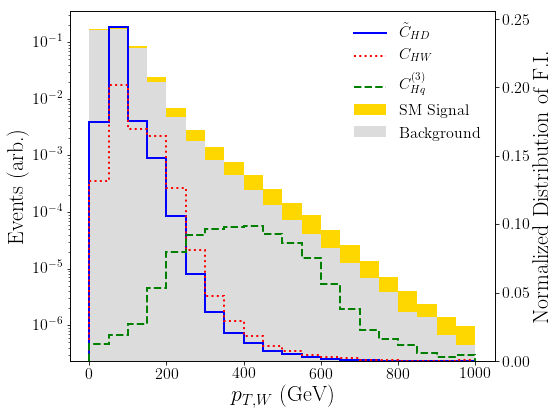

In [28]:
distribution_plot(bins_histo_wph_mu_ptw, 'pt_w', r'$p_{T,W}$ (GeV)', fi_histo_ptw_rot, 'info_dist_ptw')

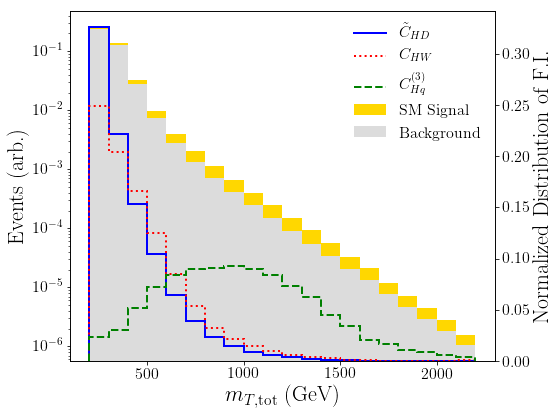

In [37]:
distribution_plot(bins_histo_wph_mu_mttot, 'mt_tot',r'$m_{T,\mathrm{tot}}$ (GeV)', fi_histo_mttot_rot, 'info_dist_mttot')

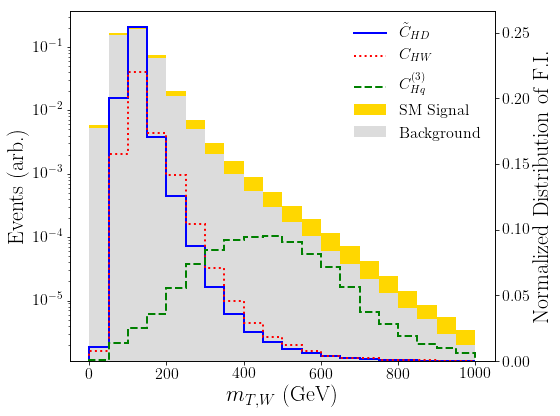

In [99]:
distribution_plot(bins_histo_wph_mu_mtlv, 'mt_lv', r'$m_{T,W}$ (GeV)', fi_histo_mtlv_rot, 'info_dist_mtlv')

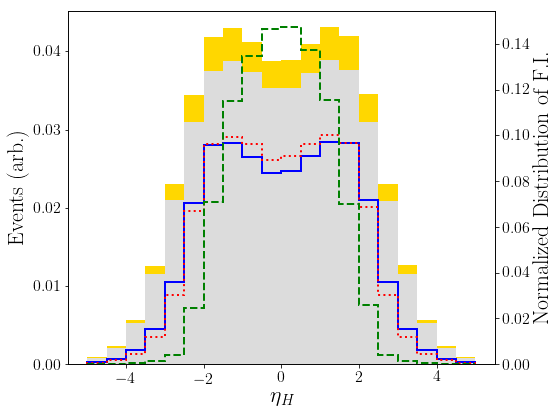

In [95]:
distribution_plot(bins_histo_wph_mu_etah, 'eta_h', r'$\eta_{H}$', fi_histo_etah_rot, 'info_dist_etah', log_y_axis=False, include_legend=False)

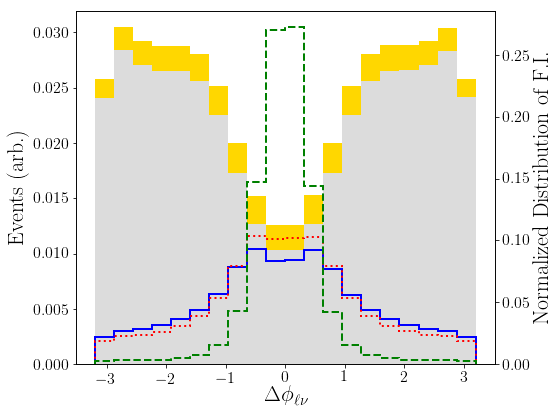

In [96]:
distribution_plot(bins_histo_wph_mu_dphilv, 'dphi_lv', r'$\Delta \phi_{\ell\nu}$', fi_histo_dphilv_rot, 'info_dist_dphilv', log_y_axis=False, include_legend=False)

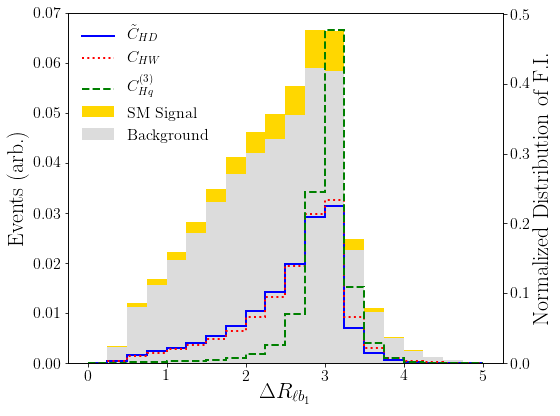

In [97]:
distribution_plot(bins_histo_wph_mu_drlb1, 'dR_lb1', r'$\Delta R_{\ell b_1}$', fi_histo_drlb1_rot, 'info_dist_drlb1', log_y_axis=False, legend_loc='upper left')

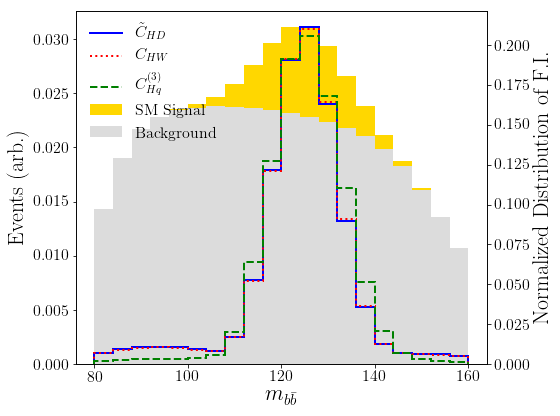

In [98]:
distribution_plot(bins_histo_wph_mu_mbb, 'm_bb', r'$m_{b\bar{b}}$', fi_histo_mbb_rot, 'info_dist_mbb', log_y_axis=False, legend_loc='upper left')

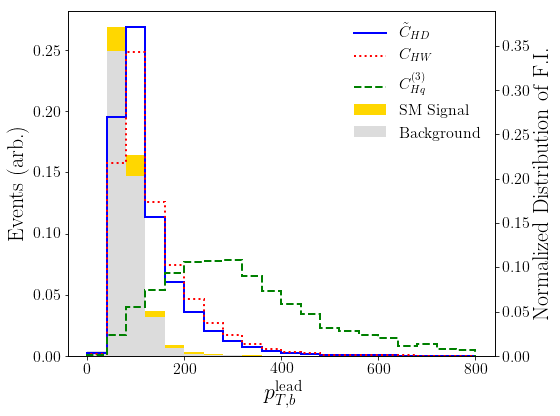

In [107]:
distribution_plot(bins_histo_wph_mu_ptb1, 'pt_b1', r'$p_{T,b}^{\mathrm{lead}}$', fi_histo_ptb1_rot, 'info_dist_ptb1', log_y_axis=False, legend_loc='upper right')

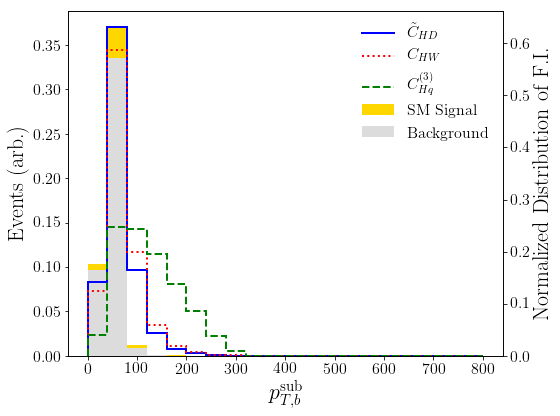

In [115]:
distribution_plot(bins_histo_wph_mu_ptb2, 'pt_b2', r'$p_{T,b}^{\mathrm{sub}}$', fi_histo_ptb2_rot, 'info_dist_ptb2', log_y_axis=False, legend_loc='upper right')

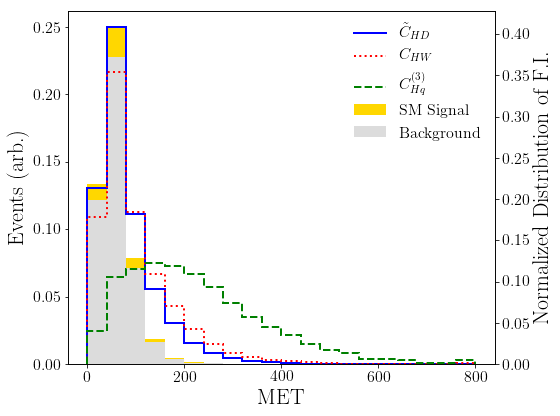

In [123]:
distribution_plot(bins_histo_wph_mu_met, 'met', r'$\mathrm{MET}$', fi_histo_met_rot, 'info_dist_met', log_y_axis=False, legend_loc='upper right')

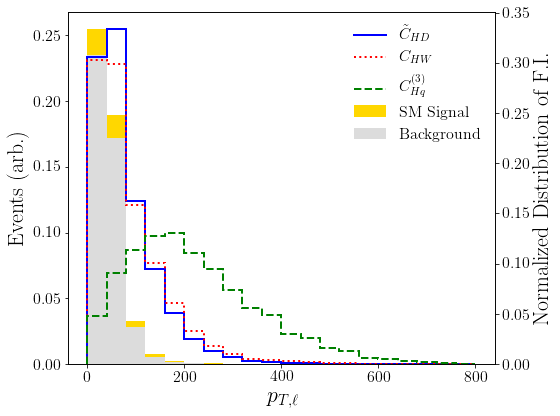

In [131]:
distribution_plot(bins_histo_wph_mu_ptl, 'pt_l', r'$p_{T,\ell}$', fi_histo_ptl_rot, 'info_dist_ptl', log_y_axis=False, legend_loc='upper right')

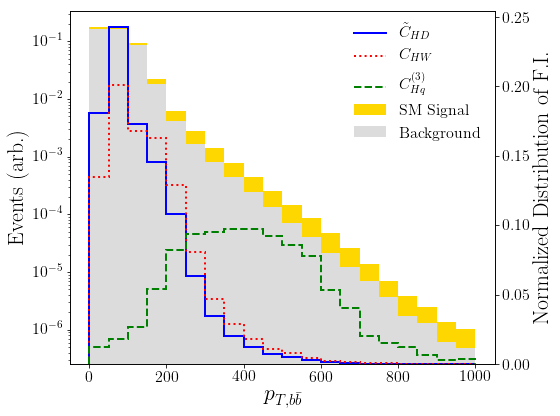

In [141]:
distribution_plot(bins_histo_wph_mu_ptbb, 'pt_h', r'$p_{T,b\bar{b}}$', fi_histo_ptbb_rot, 'info_dist_ptbb', log_y_axis=True, legend_loc='upper right')

## Alternative Distributions

We're also going to plot a few other things:
* The distributions of the _kinematic only_ information (with backgrounds)
* The same, but _without_ backgrounds
* The distribution of the diagonalized information

The kinematic only information is actually just the full information - the rate information, so this is trivial.

### Distribution of Kinematic Only Information (with Backgrounds)

In [ ]:
bins_ptw = bins_histo_wph_mu_ptw
xvals = [ (bins_ptw[i] + bins_ptw[i+1]) / 2 for i in range(0, len(bins_ptw) - 1)]
xvals = [ bins_ptw[0] - 1e-9 ] + xvals + [bins_ptw[len(bins_ptw) - 1] + 1e-9]
thisrange = (bins_ptw[0], bins_ptw[-1])

ptw_index = sa_bkgs_wph_mu.observables.keys().index('pt_w')
#x_weighted_bkg[:,thisindex]

fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)
fig.subplots_adjust(left=0.1667, right=0.8333, bottom=0.17, top=0.97)

ax1.set_ylabel('Events (arb.)', color='black',fontsize=18)
ax1.set_xlabel(r'$p_{T,W}$ (GeV)', color='black',fontsize=18)

ax1.hist(
    [ x_weighted_bkg[:,ptw_index], x_weighted_sig[:,ptw_index] ],
    weights = [ weights_bkg, weights_sig ],
    bins = bins_ptw,
    histtype='stepfilled',
    stacked=True,
    color=[color_bkg, color_sig],
    alpha=1.0
)

ax1.set_yscale('log')

## Second Axis for F.I.

ax2 = ax1.twinx()
ax2.set_ylabel(r'Normalized Distribution of F.I.', color='black',fontsize=18)

fi1_norm = sum([fi_histo_ptw_rot[i][0,0] - fi_histo_rate_ptw_rot[i][0,0] for i in range(len(fi_histo_ptw_rot))])
fi2_norm = sum([fi_histo_ptw_rot[i][1,1] - fi_histo_rate_ptw_rot[i][1,1] for i in range(len(fi_histo_ptw_rot))])
fi3_norm = sum([fi_histo_ptw_rot[i][2,2] - fi_histo_rate_ptw_rot[i][2,2] for i in range(len(fi_histo_ptw_rot))])

ax2.hist(
    xvals,
    weights = [ 1./(fi1_norm)*(fi_histo_ptw_rot[i][0,0] - fi_histo_rate_ptw_rot[i][0,0]) for i in range(len(fi_histo_ptw_rot)) ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color1,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle1,
    label=r'$c_{H\boxdot} - \frac{1}{4}c_{HD}$'
)

ax2.hist(
    xvals,
    weights = [ 1./(fi2_norm)*(fi_histo_ptw_rot[i][1,1] - fi_histo_rate_ptw_rot[i][1,1]) for i in range(len(fi_histo_ptw_rot)) ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color2,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle2,
    label=r'$c_{HW}$'
)

ax2.hist(
    xvals,
    weights = [ 1./(fi3_norm)*(fi_histo_ptw_rot[i][2,2] - fi_histo_rate_ptw_rot[i][2,2]) for i in range(len(fi_histo_ptw_rot)) ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color3,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle3,
    label=r'$c_{Hq}^{(3)}$'
)

ax2.legend(loc='upper right',fontsize=16,frameon=False)

plt.tight_layout()
#plt.savefig('plots/info_dist_ptw.png')
plt.show()

## The Binned Information w/o Backgrounds

### $p_{T,W}$

In [44]:
bins_histo_wph_mu_nobkgs_ptw, w_in_histo_wph_mu_nobkgs_ptw, fi_histo_rate_wph_mu_nobkgs_ptw, fi_histo_wph_mu_nobkgs_ptw = fisher_wph_mu_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/met/sally_ensemble_wph_mu_smeftsim_met',
)

18:29 madminer.ml          INFO    Found score ensemble with 5 estimators
18:29 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_mu_smeftsim_met/estimator_0
18:29 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_mu_smeftsim_met/estimator_1
18:29 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_mu_smeftsim_met/estimator_2
18:29 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_mu_smeftsim_met/estimator_3
18:29 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_mu_smeftsim_met/estimator_4
18:30 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 2
18:30 madminer.ml          INFO    Starting score evaluation
18:30 madminer.ml          INFO    Starting score evaluation
18:30 madminer.ml          INFO    Starting score evaluation
18:30 madminer.ml          INFO    Starting score evaluation
18:30 madminer.ml          INFO 

In [45]:
bins_histo_wph_e_nobkgs_ptw, w_in_histo_wph_e_nobkgs_ptw, fi_histo_rate_wph_e_nobkgs_ptw, fi_histo_wph_e_nobkgs_ptw = fisher_wph_e_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/met/sally_ensemble_wph_e_smeftsim_met',
)

18:31 madminer.ml          INFO    Found score ensemble with 5 estimators
18:31 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_e_smeftsim_met/estimator_0
18:31 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_e_smeftsim_met/estimator_1
18:31 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_e_smeftsim_met/estimator_2
18:31 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_e_smeftsim_met/estimator_3
18:31 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_e_smeftsim_met/estimator_4
18:32 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 2
18:32 madminer.ml          INFO    Starting score evaluation
18:32 madminer.ml          INFO    Starting score evaluation
18:32 madminer.ml          INFO    Starting score evaluation
18:32 madminer.ml          INFO    Starting score evaluation
18:32 madminer.ml          INFO    St

In [46]:
bins_histo_wmh_mu_nobkgs_ptw, w_in_histo_wmh_mu_nobkgs_ptw, fi_histo_rate_wmh_mu_nobkgs_ptw, fi_histo_wmh_mu_nobkgs_ptw = fisher_wmh_mu_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/met/sally_ensemble_wmh_mu_smeftsim_met',
)

18:33 madminer.ml          INFO    Found score ensemble with 5 estimators
18:33 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_mu_smeftsim_met/estimator_0
18:33 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_mu_smeftsim_met/estimator_1
18:33 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_mu_smeftsim_met/estimator_2
18:33 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_mu_smeftsim_met/estimator_3
18:33 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_mu_smeftsim_met/estimator_4
18:34 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 2
18:34 madminer.ml          INFO    Starting score evaluation
18:34 madminer.ml          INFO    Starting score evaluation
18:34 madminer.ml          INFO    Starting score evaluation
18:34 madminer.ml          INFO    Starting score evaluation
18:34 madminer.ml          INFO 

In [47]:
bins_histo_wmh_e_nobkgs_ptw, w_in_histo_wmh_e_nobkgs_ptw, fi_histo_rate_wmh_e_nobkgs_ptw, fi_histo_wmh_e_nobkgs_ptw = fisher_wmh_e_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/met/sally_ensemble_wmh_e_smeftsim_met',
)

18:34 madminer.ml          INFO    Found score ensemble with 5 estimators
18:34 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_e_smeftsim_met/estimator_0
18:34 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_e_smeftsim_met/estimator_1
18:34 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_e_smeftsim_met/estimator_2
18:34 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_e_smeftsim_met/estimator_3
18:34 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_e_smeftsim_met/estimator_4
18:36 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 2
18:36 madminer.ml          INFO    Starting score evaluation
18:36 madminer.ml          INFO    Starting score evaluation
18:36 madminer.ml          INFO    Starting score evaluation
18:36 madminer.ml          INFO    Starting score evaluation
18:36 madminer.ml          INFO    St

In [48]:
fi_histo_rate_nobkgs_ptw = [ fi_histo_rate_wph_mu_nobkgs_ptw[i]
                     + fi_histo_rate_wph_e_nobkgs_ptw[i] 
                     + fi_histo_rate_wmh_mu_nobkgs_ptw[i] 
                     + fi_histo_rate_wmh_e_nobkgs_ptw[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_nobkgs_ptw)) ]

fi_histo_nobkgs_ptw = [ fi_histo_wph_mu_nobkgs_ptw[i]
                     + fi_histo_wph_e_nobkgs_ptw[i] 
                     + fi_histo_wmh_mu_nobkgs_ptw[i] 
                     + fi_histo_wmh_e_nobkgs_ptw[i] 
                     for i in range(0, len(fi_histo_wph_mu_nobkgs_ptw)) ]



In [49]:
fi_histo_rate_nobkgs_ptw_rot = [ rotate(fi) for fi in fi_histo_rate_nobkgs_ptw ]
fi_histo_nobkgs_ptw_rot = [ rotate(fi) for fi in fi_histo_nobkgs_ptw ]

In [50]:
fi_histo_nobkgs_ptw_outfile = './fisher_info/fi_histo_nobkgs_ptw.npz'

fi_histo_nobkgs_ptw_list = [
    bins_histo_wph_mu_nobkgs_ptw,
    w_in_histo_wph_mu_nobkgs_ptw,
    fi_histo_rate_wph_mu_nobkgs_ptw,
    fi_histo_wph_mu_nobkgs_ptw,
    bins_histo_wph_e_nobkgs_ptw,
    w_in_histo_wph_e_nobkgs_ptw,
    fi_histo_rate_wph_e_nobkgs_ptw,
    fi_histo_wph_e_nobkgs_ptw,
    bins_histo_wmh_mu_nobkgs_ptw,
    w_in_histo_wmh_mu_nobkgs_ptw,
    fi_histo_rate_wmh_mu_nobkgs_ptw,
    fi_histo_wmh_mu_nobkgs_ptw,
    bins_histo_wmh_e_nobkgs_ptw,
    w_in_histo_wmh_e_nobkgs_ptw,
    fi_histo_rate_wmh_e_nobkgs_ptw,
    fi_histo_wmh_e_nobkgs_ptw,
]

In [51]:
np.savez(fi_histo_nobkgs_ptw_outfile, fi_histo_nobkgs_ptw_list, allow_pickle=False)

### $m_{T,\mathrm{tot}}$

In [9]:
bins_histo_wph_mu_nobkgs_mttot, w_in_histo_wph_mu_nobkgs_mttot, fi_histo_rate_wph_mu_nobkgs_mttot, fi_histo_wph_mu_nobkgs_mttot = fisher_wph_mu_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='mt_tot',
    nbins=20,
    histrange=(200,2200),
    model_file='models/met/sally_ensemble_wph_mu_smeftsim_met',
)

20:28 madminer.ml          INFO    Found score ensemble with 5 estimators
20:28 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_mu_smeftsim_met/estimator_0
20:28 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_mu_smeftsim_met/estimator_1
20:28 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_mu_smeftsim_met/estimator_2
20:28 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_mu_smeftsim_met/estimator_3
20:28 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_mu_smeftsim_met/estimator_4
20:29 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 2
20:29 madminer.ml          INFO    Starting score evaluation
20:29 madminer.ml          INFO    Starting score evaluation
20:29 madminer.ml          INFO    Starting score evaluation
20:29 madminer.ml          INFO    Starting score evaluation
20:29 madminer.ml          INFO 

In [10]:
bins_histo_wph_e_nobkgs_mttot, w_in_histo_wph_e_nobkgs_mttot, fi_histo_rate_wph_e_nobkgs_mttot, fi_histo_wph_e_nobkgs_mttot = fisher_wph_e_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='mt_tot',
    nbins=20,
    histrange=(200,2200),
    model_file='models/met/sally_ensemble_wph_e_smeftsim_met',
)

20:29 madminer.ml          INFO    Found score ensemble with 5 estimators
20:29 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_e_smeftsim_met/estimator_0
20:29 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_e_smeftsim_met/estimator_1
20:29 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_e_smeftsim_met/estimator_2
20:29 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_e_smeftsim_met/estimator_3
20:29 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wph_e_smeftsim_met/estimator_4
20:30 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 2
20:30 madminer.ml          INFO    Starting score evaluation
20:30 madminer.ml          INFO    Starting score evaluation
20:30 madminer.ml          INFO    Starting score evaluation
20:30 madminer.ml          INFO    Starting score evaluation
20:30 madminer.ml          INFO    St

In [11]:
bins_histo_wmh_mu_nobkgs_mttot, w_in_histo_wmh_mu_nobkgs_mttot, fi_histo_rate_wmh_mu_nobkgs_mttot, fi_histo_wmh_mu_nobkgs_mttot = fisher_wmh_mu_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='mt_tot',
    nbins=20,
    histrange=(200,2200),
    model_file='models/met/sally_ensemble_wmh_mu_smeftsim_met',
)

20:31 madminer.ml          INFO    Found score ensemble with 5 estimators
20:31 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_mu_smeftsim_met/estimator_0
20:31 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_mu_smeftsim_met/estimator_1
20:31 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_mu_smeftsim_met/estimator_2
20:31 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_mu_smeftsim_met/estimator_3
20:31 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_mu_smeftsim_met/estimator_4
20:32 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 2
20:32 madminer.ml          INFO    Starting score evaluation
20:32 madminer.ml          INFO    Starting score evaluation
20:32 madminer.ml          INFO    Starting score evaluation
20:32 madminer.ml          INFO    Starting score evaluation
20:32 madminer.ml          INFO 

In [12]:
bins_histo_wmh_e_nobkgs_mttot, w_in_histo_wmh_e_nobkgs_mttot, fi_histo_rate_wmh_e_nobkgs_mttot, fi_histo_wmh_e_nobkgs_mttot = fisher_wmh_e_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,0.],
    luminosity=100*1000.,
    observable='mt_tot',
    nbins=20,
    histrange=(200,2200),
    model_file='models/met/sally_ensemble_wmh_e_smeftsim_met',
)

20:32 madminer.ml          INFO    Found score ensemble with 5 estimators
20:32 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_e_smeftsim_met/estimator_0
20:32 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_e_smeftsim_met/estimator_1
20:32 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_e_smeftsim_met/estimator_2
20:32 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_e_smeftsim_met/estimator_3
20:32 madminer.ml          INFO    Loading model from models/met/sally_ensemble_wmh_e_smeftsim_met/estimator_4
20:33 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 2
20:33 madminer.ml          INFO    Starting score evaluation
20:33 madminer.ml          INFO    Starting score evaluation
20:33 madminer.ml          INFO    Starting score evaluation
20:33 madminer.ml          INFO    Starting score evaluation
20:33 madminer.ml          INFO    St

In [13]:
fi_histo_rate_nobkgs_mttot = [ fi_histo_rate_wph_mu_nobkgs_mttot[i]
                     + fi_histo_rate_wph_e_nobkgs_mttot[i] 
                     + fi_histo_rate_wmh_mu_nobkgs_mttot[i] 
                     + fi_histo_rate_wmh_e_nobkgs_mttot[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_nobkgs_mttot)) ]

fi_histo_nobkgs_mttot = [ fi_histo_wph_mu_nobkgs_mttot[i]
                     + fi_histo_wph_e_nobkgs_mttot[i] 
                     + fi_histo_wmh_mu_nobkgs_mttot[i] 
                     + fi_histo_wmh_e_nobkgs_mttot[i] 
                     for i in range(0, len(fi_histo_wph_mu_nobkgs_mttot)) ]



In [14]:
fi_histo_rate_nobkgs_mttot_rot = [ rotate(fi) for fi in fi_histo_rate_nobkgs_mttot ]
fi_histo_nobkgs_mttot_rot = [ rotate(fi) for fi in fi_histo_nobkgs_mttot ]

In [15]:
fi_histo_nobkgs_mttot_outfile = './fisher_info/fi_histo_nobkgs_mttot.npz'

fi_histo_nobkgs_mttot_list = [
    bins_histo_wph_mu_nobkgs_mttot,
    w_in_histo_wph_mu_nobkgs_mttot,
    fi_histo_rate_wph_mu_nobkgs_mttot,
    fi_histo_wph_mu_nobkgs_mttot,
    bins_histo_wph_e_nobkgs_mttot,
    w_in_histo_wph_e_nobkgs_mttot,
    fi_histo_rate_wph_e_nobkgs_mttot,
    fi_histo_wph_e_nobkgs_mttot,
    bins_histo_wmh_mu_nobkgs_mttot,
    w_in_histo_wmh_mu_nobkgs_mttot,
    fi_histo_rate_wmh_mu_nobkgs_mttot,
    fi_histo_wmh_mu_nobkgs_mttot,
    bins_histo_wmh_e_nobkgs_mttot,
    w_in_histo_wmh_e_nobkgs_mttot,
    fi_histo_rate_wmh_e_nobkgs_mttot,
    fi_histo_wmh_e_nobkgs_mttot,
]

In [16]:
np.savez(fi_histo_nobkgs_mttot_outfile, fi_histo_nobkgs_mttot_list, allow_pickle=False)

#### Plot of the Distribution (Full Info)

In [55]:
legend_elements_sig = [
        Line2D([0],[0],color=fi_dist_color1, lw=fi_dist_linewidth,ls=fi_dist_linestyle1,
           label=r'$\tilde{C}_{HD}$'),
        Line2D([0],[0],color=fi_dist_color2, lw=fi_dist_linewidth,ls=fi_dist_linestyle2,
           label=r'$C_{HW}$'),
        Line2D([0],[0],color=fi_dist_color3, lw=fi_dist_linewidth,ls=fi_dist_linestyle3,
           label=r'$C_{Hq}^{(3)}$'),
        Patch(facecolor=color_sig, label='SM Signal'),
#        Patch(facecolor=color_bkg, label='Background')
    ]

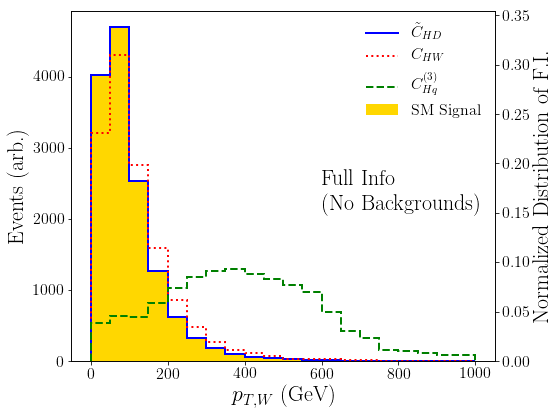

In [56]:
bins_ptw = bins_histo_wph_mu_nobkgs_ptw
xvals = [ (bins_ptw[i] + bins_ptw[i+1]) / 2 for i in range(0, len(bins_ptw) - 1)]
xvals = [ bins_ptw[0] - 1e-9 ] + xvals + [bins_ptw[len(bins_ptw) - 1] + 1e-9]
thisrange = (bins_ptw[0], bins_ptw[-1])

ptw_index = sa_bkgs_wph_mu.observables.keys().index('pt_w')
#x_weighted_bkg[:,thisindex]

fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)
fig.subplots_adjust(left=0.1667, right=0.8333, bottom=0.17, top=0.97)

ax1.set_ylabel('Events (arb.)', color='black',fontsize=22)
ax1.set_xlabel(r'$p_{T,W}$ (GeV)', color='black',fontsize=22)

ax1.hist(
    [ x_weighted_sig[:,ptw_index] ],
    weights = [ 300.*1000.*weights_sig ],
    bins = bins_ptw,
    histtype='stepfilled',
    stacked=True,
    color=[color_sig],
    alpha=1.0
)

#ax1.set_yscale('log')

## Second Axis for F.I.

ax2 = ax1.twinx()
ax2.set_ylabel(r'Normalized Distribution of F.I.', color='black',fontsize=22)

fi1_norm = sum([fi[0,0] for fi in fi_histo_nobkgs_ptw_rot])
fi2_norm = sum([fi[1,1] for fi in fi_histo_nobkgs_ptw_rot])
fi3_norm = sum([fi[2,2] for fi in fi_histo_nobkgs_ptw_rot])

ax2.hist(
    xvals,
    weights = [ 1./(fi1_norm)*fi[0,0] for fi in fi_histo_nobkgs_ptw_rot ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color1,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle1,
    label=r'$c_{H\boxdot} - \frac{1}{4}c_{HD}$'
)

ax2.hist(
    xvals,
    weights = [ 1./(fi2_norm)*fi[1,1] for fi in fi_histo_nobkgs_ptw_rot ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color2,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle2,
    label=r'$c_{HW}$'
)

ax2.hist(
    xvals,
    weights = [ 1./(fi3_norm)*fi[2,2] for fi in fi_histo_nobkgs_ptw_rot ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color3,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle3,
    label=r'$c_{Hq}^{(3)}$'
)

ax2.legend(handles=legend_elements_sig, loc='upper right',fontsize=16,frameon=False)

plt.text(600,ax2.get_ylim()[1]*0.50, r'Full Info',fontsize=22)
plt.text(600,ax2.get_ylim()[1]*0.43, r'(No Backgrounds)',fontsize=22)

plt.tight_layout()
#plt.savefig('plots/info_dist_nobkgs_ptw.pdf')
plt.show()

#### Plot of the Distribution (Kinematic Info Only)

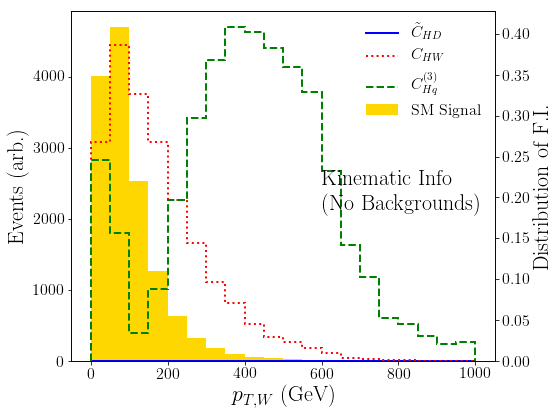

In [57]:
bins_ptw = bins_histo_wph_mu_nobkgs_ptw
xvals = [ (bins_ptw[i] + bins_ptw[i+1]) / 2 for i in range(0, len(bins_ptw) - 1)]
xvals = [ bins_ptw[0] - 1e-9 ] + xvals + [bins_ptw[len(bins_ptw) - 1] + 1e-9]
thisrange = (bins_ptw[0], bins_ptw[-1])

ptw_index = sa_bkgs_wph_mu.observables.keys().index('pt_w')
#x_weighted_bkg[:,thisindex]

fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)
fig.subplots_adjust(left=0.1667, right=0.8333, bottom=0.17, top=0.97)

ax1.set_ylabel('Events (arb.)', color='black',fontsize=22)
ax1.set_xlabel(r'$p_{T,W}$ (GeV)', color='black',fontsize=22)

ax1.hist(
    [ x_weighted_sig[:,ptw_index] ],
    weights = [ 300.*1000.*weights_sig ],
    bins = bins_ptw,
    histtype='stepfilled',
    stacked=True,
    color=[color_sig],
    alpha=1.0
)

#ax1.set_yscale('log')

## Second Axis for F.I.

ax2 = ax1.twinx()
ax2.set_ylabel(r'Distribution of F.I.', color='black',fontsize=22)

fi1_norm = 1.0
fi2_norm = 1.0
fi3_norm = 1.0


ax2.hist(
    xvals,
    weights = [ 1./(fi1_norm)*(fi_histo_nobkgs_ptw_rot[i][0,0] - fi_histo_rate_nobkgs_ptw_rot[i][0,0]) for i in range(len(fi_histo_nobkgs_ptw_rot)) ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color1,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle1,
    label=r'$c_{H\boxdot} - \frac{1}{4}c_{HD}$'
)

ax2.hist(
    xvals,
    weights = [ 1./(fi2_norm)*(fi_histo_nobkgs_ptw_rot[i][1,1] - fi_histo_rate_nobkgs_ptw_rot[i][1,1]) for i in range(len(fi_histo_nobkgs_ptw_rot)) ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color2,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle2,
    label=r'$c_{HW}$'
)

ax2.hist(
    xvals,
    weights = [ 1./(fi3_norm)*(fi_histo_nobkgs_ptw_rot[i][2,2] - fi_histo_rate_nobkgs_ptw_rot[i][2,2]) for i in range(len(fi_histo_nobkgs_ptw_rot)) ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color3,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle3,
    label=r'$c_{Hq}^{(3)}$'
)

ax2.legend(handles=legend_elements_sig, loc='upper right',fontsize=16,frameon=False)

plt.text(600,ax2.get_ylim()[1]*0.50, r'Kinematic Info',fontsize=22)
plt.text(600,ax2.get_ylim()[1]*0.43, r'(No Backgrounds)',fontsize=22)

plt.tight_layout()
#plt.savefig('plots/info_dist_nobkgs_ptw_kinematic.pdf')
plt.show()

### Distribution of the Diagonalized Information

In [ ]:
print(np.arctan(1.2)*180/np.pi)

In [ ]:
fi_test = rotate(fi_sally_wph_mu_wbkgs_met_mean, include_nuisance_params=False)

print(fi_test)
evals, s = np.linalg.eig(fi_test)
print('Eigenvalues: {}\n'.format(evals))
print('S: {}\n'.format(s))

print(np.linalg.inv(s).dot(fi_test).dot(s))


#### With Backgrounds

In [ ]:
# Get the rotation matrix for moving to the eigenbasis
eigenvals, s = np.linalg.eig(rotate(fi_sally_wph_mu_wbkgs_met_mean))

fi_histo_rate_ptw_eig = [ np.linalg.inv(s).dot(fi).dot(s) for fi in fi_histo_rate_ptw_rot ]
fi_histo_ptw_eig = [ np.linalg.inv(s).dot(fi).dot(s) for fi in fi_histo_ptw_rot ]

In [ ]:
bins_ptw = bins_histo_wph_mu_ptw
xvals = [ (bins_ptw[i] + bins_ptw[i+1]) / 2 for i in range(0, len(bins_ptw) - 1)]
xvals = [ bins_ptw[0] - 1e-9 ] + xvals + [bins_ptw[len(bins_ptw) - 1] + 1e-9]
thisrange = (bins_ptw[0], bins_ptw[-1])

ptw_index = sa_bkgs_wph_mu.observables.keys().index('pt_w')
#x_weighted_bkg[:,thisindex]

fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)
fig.subplots_adjust(left=0.1667, right=0.8333, bottom=0.17, top=0.97)

ax1.set_ylabel('Events (arb.)', color='black',fontsize=18)
ax1.set_xlabel(r'$p_{T,W}$ (GeV)', color='black',fontsize=18)

ax1.hist(
    [ x_weighted_bkg[:,ptw_index], x_weighted_sig[:,ptw_index] ],
    weights = [ weights_bkg, weights_sig ],
    bins = bins_ptw,
    histtype='stepfilled',
    stacked=True,
    color=[color_bkg, color_sig],
    alpha=1.0
)

ax1.set_yscale('log')

## Second Axis for F.I.

ax2 = ax1.twinx()
ax2.set_ylabel(r'Normalized Distribution of F.I.', color='black',fontsize=18)

fi1_norm = sum([fi[0,0] for fi in fi_histo_ptw_eig])
fi2_norm = sum([fi[1,1] for fi in fi_histo_ptw_eig])
fi3_norm = sum([fi[2,2] for fi in fi_histo_ptw_eig])

ax2.hist(
    xvals,
    weights = [ 1./(fi1_norm)*fi[0,0] for fi in fi_histo_ptw_eig ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color1,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle1,
    label=r'$\hat{e}_1$'
)

ax2.hist(
    xvals,
    weights = [ 1./(fi2_norm)*fi[1,1] for fi in fi_histo_ptw_eig ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color2,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle2,
    label=r'$\hat{e}_2$'
)

ax2.hist(
    xvals,
    weights = [ 1./(fi3_norm)*fi[2,2] for fi in fi_histo_ptw_eig ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color3,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle3,
    label=r'$\hat{e}_3$'
)

ax2.legend(loc='upper right',frameon=False)

plt.tight_layout()
#plt.savefig('plots/info_dist_ptw.png')
plt.show()

In [ ]:
# Get the rotation matrix for moving to the eigenbasis
eigenvals_nobkgs, s_nobkgs = np.linalg.eig(rotate(fi_sally_wph_mu_met_mean))

fi_histo_rate_nobkgs_ptw_eig = [ np.linalg.inv(s_nobkgs).dot(fi).dot(s_nobkgs) for fi in fi_histo_rate_wph_mu_nobkgs_ptw_rot ]
fi_histo_nobkgs_ptw_eig = [ np.linalg.inv(s_nobkgs).dot(fi).dot(s_nobkgs) for fi in fi_histo_wph_mu_nobkgs_ptw_rot ]

In [ ]:
bins_ptw = bins_histo_wph_mu_ptw
xvals = [ (bins_ptw[i] + bins_ptw[i+1]) / 2 for i in range(0, len(bins_ptw) - 1)]
xvals = [ bins_ptw[0] - 1e-9 ] + xvals + [bins_ptw[len(bins_ptw) - 1] + 1e-9]
thisrange = (bins_ptw[0], bins_ptw[-1])

ptw_index = sa_bkgs_wph_mu.observables.keys().index('pt_w')
#x_weighted_bkg[:,thisindex]

fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)
fig.subplots_adjust(left=0.1667, right=0.8333, bottom=0.17, top=0.97)

ax1.set_ylabel('Events (arb.)', color='black',fontsize=18)
ax1.set_xlabel(r'$p_{T,W}$ (GeV)', color='black',fontsize=18)

ax1.hist(
#    [ x_weighted_bkg[:,ptw_index], x_weighted_sig[:,ptw_index] ],
#    weights = [ weights_bkg, weights_sig ],
    [ x_weighted_sig[:,ptw_index] ],
    weights = [weights_sig ],
    bins = bins_ptw,
    histtype='stepfilled',
    stacked=True,
#    color=[color_bkg, color_sig],
    color=[color_sig],
    alpha=1.0
)

#ax1.set_yscale('log')

## Second Axis for F.I.

ax2 = ax1.twinx()
ax2.set_ylabel(r'Normalized Distribution of F.I.', color='black',fontsize=18)

fi1_norm = sum([fi[0,0] for fi in fi_histo_nobkgs_ptw_eig])
fi2_norm = sum([fi[1,1] for fi in fi_histo_nobkgs_ptw_eig])
fi3_norm = sum([fi[2,2] for fi in fi_histo_nobkgs_ptw_eig])

ax2.hist(
    xvals,
    weights = [ 1./(fi1_norm)*fi[0,0] for fi in fi_histo_nobkgs_ptw_eig ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color1,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle1,
    label=r'$\hat{e}_1$'
)

ax2.hist(
    xvals,
    weights = [ 1./(fi2_norm)*fi[1,1] for fi in fi_histo_nobkgs_ptw_eig ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color2,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle2,
    label=r'$\hat{e}_2$'
)

ax2.hist(
    xvals,
    weights = [ 1./(fi3_norm)*fi[2,2] for fi in fi_histo_nobkgs_ptw_eig ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color3,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle3,
    label=r'$\hat{e}_3$'
)

ax2.legend(loc='upper right',frameon=False)


#plt.text(600,0.25,r'Full Info',fontsize=16)
#plt.text(600,0.23,r'(No Backgrounds)',fontsize=16)


plt.tight_layout()
#plt.savefig('plots/info_dist_ptw.png')
plt.show()

## Getting at the dim6^2 and Interference Terms

We're going to try and get the distribution of the information from the dim6^2 and interference terms. To do so, we'll just compute the information at multiple parameter points, then fit the result to a + b*x + c*x^2 (where x here is the Wilson coefficient). From there we should be able to build the distributions we want.

### $c_{HW}$

#### $c_{HW} = 1$

In [ ]:
bins_histo_wph_mu_ptw_chw_1, w_in_histo_wph_mu_ptw_chw_1, fi_histo_rate_wph_mu_ptw_chw_1, fi_histo_wph_mu_ptw_chw_1 = fisher_wph_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,1.,0],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/sally_ensemble_wph_mu_wbkgs_met',
)

In [ ]:
bins_histo_wph_e_ptw_chw_1, w_in_histo_wph_e_ptw_chw_1, fi_histo_rate_wph_e_ptw_chw_1, fi_histo_wph_e_ptw_chw_1 = fisher_wph_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,1.,0],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/sally_ensemble_wph_e_wbkgs_met',
)

In [ ]:
bins_histo_wmh_mu_ptw_chw_1, w_in_histo_wmh_mu_ptw_chw_1, fi_histo_rate_wmh_mu_ptw_chw_1, fi_histo_wmh_mu_ptw_chw_1 = fisher_wmh_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,1.,0],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/sally_ensemble_wmh_mu_wbkgs_met',
)

In [ ]:
bins_histo_wmh_e_ptw_chw_1, w_in_histo_wmh_e_ptw_chw_1, fi_histo_rate_wmh_e_ptw_chw_1, fi_histo_wmh_e_ptw_chw_1 = fisher_wmh_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,1.,0],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/sally_ensemble_wmh_e_wbkgs_met',
)

In [ ]:
fi_histo_rate_ptw_chw_1 = [ fi_histo_rate_wph_mu_ptw_chw_1[i]
                     + fi_histo_rate_wph_e_ptw_chw_1[i] 
                     + fi_histo_rate_wmh_mu_ptw_chw_1[i] 
                     + fi_histo_rate_wmh_e_ptw_chw_1[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_ptw_chw_1)) ]

fi_histo_ptw_chw_1 = [ fi_histo_wph_mu_ptw_chw_1[i]
                     + fi_histo_wph_e_ptw_chw_1[i] 
                     + fi_histo_wmh_mu_ptw_chw_1[i] 
                     + fi_histo_wmh_e_ptw_chw_1[i] 
                     for i in range(0, len(fi_histo_wph_mu_ptw_chw_1)) ]

fi_histo_rate_ptw_chw_1_rot = [ rotate(fi_histo_rate_ptw_chw_1[i]) for i in range(0, len(fi_histo_rate_ptw_chw_1)) ]
fi_histo_ptw_chw_1_rot = [ rotate(fi_histo_ptw_chw_1[i]) for i in range(0, len(fi_histo_ptw_chw_1)) ]

#### $c_{HW} = 2$

In [ ]:
bins_histo_wph_mu_ptw_chw_2, w_in_histo_wph_mu_ptw_chw_2, fi_histo_rate_wph_mu_ptw_chw_2, fi_histo_wph_mu_ptw_chw_2 = fisher_wph_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,2.,0.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/sally_ensemble_wph_mu_wbkgs_met',
)

In [ ]:
bins_histo_wph_e_ptw_chw_2, w_in_histo_wph_e_ptw_chw_2, fi_histo_rate_wph_e_ptw_chw_2, fi_histo_wph_e_ptw_chw_2 = fisher_wph_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,2.,0.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/sally_ensemble_wph_e_wbkgs_met',
)

In [ ]:
bins_histo_wmh_mu_ptw_chw_2, w_in_histo_wmh_mu_ptw_chw_2, fi_histo_rate_wmh_mu_ptw_chw_2, fi_histo_wmh_mu_ptw_chw_2 = fisher_wmh_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,2.,0.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/sally_ensemble_wmh_mu_wbkgs_met',
)

In [ ]:
bins_histo_wmh_e_ptw_chw_2, w_in_histo_wmh_e_ptw_chw_2, fi_histo_rate_wmh_e_ptw_chw_2, fi_histo_wmh_e_ptw_chw_2 = fisher_wmh_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,2.,0.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/sally_ensemble_wmh_e_wbkgs_met',
)

In [ ]:
fi_histo_rate_ptw_chw_2 = [ fi_histo_rate_wph_mu_ptw_chw_2[i]
                     + fi_histo_rate_wph_e_ptw_chw_2[i] 
                     + fi_histo_rate_wmh_mu_ptw_chw_2[i] 
                     + fi_histo_rate_wmh_e_ptw_chw_2[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_ptw_chw_2)) ]

fi_histo_ptw_chw_2 = [ fi_histo_wph_mu_ptw_chw_2[i]
                     + fi_histo_wph_e_ptw_chw_2[i] 
                     + fi_histo_wmh_mu_ptw_chw_2[i] 
                     + fi_histo_wmh_e_ptw_chw_2[i] 
                     for i in range(0, len(fi_histo_wph_mu_ptw_chw_2)) ]

fi_histo_rate_ptw_chw_2_rot = [ rotate(fi_histo_rate_ptw_chw_2[i]) for i in range(0, len(fi_histo_rate_ptw_chw_2)) ]
fi_histo_ptw_chw_2_rot = [ rotate(fi_histo_ptw_chw_2[i]) for i in range(0, len(fi_histo_ptw_chw_2)) ]

### $c_{Hq}^{(3)}$

In [ ]:
bins_histo_wph_mu_ptw_chq3_1, w_in_histo_wph_mu_ptw_chq3_1, fi_histo_rate_wph_mu_ptw_chq3_1, fi_histo_wph_mu_ptw_chq3_1 = fisher_wph_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,1.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/sally_ensemble_wph_mu_wbkgs_met',
)

In [ ]:
bins_histo_wph_e_ptw_chq3_1, w_in_histo_wph_e_ptw_chq3_1, fi_histo_rate_wph_e_ptw_chq3_1, fi_histo_wph_e_ptw_chq3_1 = fisher_wph_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,1.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/sally_ensemble_wph_e_wbkgs_met',
)

In [ ]:
bins_histo_wmh_mu_ptw_chq3_1, w_in_histo_wmh_mu_ptw_chq3_1, fi_histo_rate_wmh_mu_ptw_chq3_1, fi_histo_wmh_mu_ptw_chq3_1 = fisher_wmh_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,1.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/sally_ensemble_wmh_mu_wbkgs_met',
)

In [ ]:
bins_histo_wmh_e_ptw_chq3_1, w_in_histo_wmh_e_ptw_chq3_1, fi_histo_rate_wmh_e_ptw_chq3_1, fi_histo_wmh_e_ptw_chq3_1 = fisher_wmh_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,1.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/sally_ensemble_wmh_e_wbkgs_met',
)

In [ ]:
fi_histo_rate_ptw_chq3_1 = [ fi_histo_rate_wph_mu_ptw_chq3_1[i]
                     + fi_histo_rate_wph_e_ptw_chq3_1[i] 
                     + fi_histo_rate_wmh_mu_ptw_chq3_1[i] 
                     + fi_histo_rate_wmh_e_ptw_chq3_1[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_ptw_chq3_1)) ]

fi_histo_ptw_chq3_1 = [ fi_histo_wph_mu_ptw_chq3_1[i]
                     + fi_histo_wph_e_ptw_chq3_1[i] 
                     + fi_histo_wmh_mu_ptw_chq3_1[i] 
                     + fi_histo_wmh_e_ptw_chq3_1[i] 
                     for i in range(0, len(fi_histo_wph_mu_ptw_chq3_1)) ]

fi_histo_rate_ptw_chq3_1_rot = [ rotate(fi_histo_rate_ptw_chq3_1[i]) for i in range(0, len(fi_histo_rate_ptw_chq3_1)) ]
fi_histo_ptw_chq3_1_rot = [ rotate(fi_histo_ptw_chq3_1[i]) for i in range(0, len(fi_histo_ptw_chq3_1)) ]

#### $c_{Hq}^{(3)} = 2$

In [ ]:
bins_histo_wph_mu_ptw_chq3_2, w_in_histo_wph_mu_ptw_chq3_2, fi_histo_rate_wph_mu_ptw_chq3_2, fi_histo_wph_mu_ptw_chq3_2 = fisher_wph_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,2.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/sally_ensemble_wph_mu_wbkgs_met',
)

In [ ]:
bins_histo_wph_e_ptw_chq3_2, w_in_histo_wph_e_ptw_chq3_2, fi_histo_rate_wph_e_ptw_chq3_2, fi_histo_wph_e_ptw_chq3_2 = fisher_wph_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,2.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/sally_ensemble_wph_e_wbkgs_met',
)

In [ ]:
bins_histo_wmh_mu_ptw_chq3_2, w_in_histo_wmh_mu_ptw_chq3_2, fi_histo_rate_wmh_mu_ptw_chq3_2, fi_histo_wmh_mu_ptw_chq3_2 = fisher_wmh_mu_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,2.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/sally_ensemble_wmh_mu_wbkgs_met',
)

In [ ]:
bins_histo_wmh_e_ptw_chq3_2, w_in_histo_wmh_e_ptw_chq3_2, fi_histo_rate_wmh_e_ptw_chq3_2, fi_histo_wmh_e_ptw_chq3_2 = fisher_wmh_e_wbkgs_met.histogram_of_fisher_information(
    theta=[0.,0.,0.,2.],
    luminosity=100*1000.,
    observable='pt_w',
    nbins=20,
    histrange=(0,1000),
    model_file='models/sally_ensemble_wmh_e_wbkgs_met',
)

In [ ]:
fi_histo_rate_ptw_chq3_2 = [ fi_histo_rate_wph_mu_ptw_chq3_2[i]
                     + fi_histo_rate_wph_e_ptw_chq3_2[i] 
                     + fi_histo_rate_wmh_mu_ptw_chq3_2[i] 
                     + fi_histo_rate_wmh_e_ptw_chq3_2[i] 
                     for i in range(0, len(fi_histo_rate_wph_mu_ptw_chq3_2)) ]

fi_histo_ptw_chq3_2 = [ fi_histo_wph_mu_ptw_chq3_2[i]
                     + fi_histo_wph_e_ptw_chq3_2[i] 
                     + fi_histo_wmh_mu_ptw_chq3_2[i] 
                     + fi_histo_wmh_e_ptw_chq3_2[i] 
                     for i in range(0, len(fi_histo_wph_mu_ptw_chq3_2)) ]

fi_histo_rate_ptw_chq3_2_rot = [ rotate(fi_histo_rate_ptw_chq3_2[i]) for i in range(0, len(fi_histo_rate_ptw_chq3_2)) ]
fi_histo_ptw_chq3_2_rot = [ rotate(fi_histo_ptw_chq3_2[i]) for i in range(0, len(fi_histo_ptw_chq3_2)) ]

### Distributions

#### $c_{HW}$

In [ ]:
chw_dist_0 = [ fi[1,1] for fi in fi_histo_ptw_rot ]
chw_dist_1 = [ fi[1,1] for fi in fi_histo_ptw_chw_1_rot ]
chw_dist_2 = [ fi[1,1] for fi in fi_histo_ptw_chw_2_rot ]

In [ ]:
chw_dist = [ [chw_dist_0[i] , chw_dist_1[i] , chw_dist_2[i]] for i in range(len(chw_dist_0)) ]

In [ ]:
x = np.array([0.0, 1.0, 2.0])
chw_fits = [np.polyfit(x, y, 2).tolist() for y in chw_dist]

In [ ]:
plt.hist(
    xvals,
    weights = [ arr[0] for arr in chw_fits ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color2,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle2,
    label=r'$c_{HW}$',
)

In [ ]:
plt.hist(
    xvals,
    weights = [ arr[1] for arr in chw_fits ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color2,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle2,
    label=r'$c_{HW}$',
)

In [ ]:
plt.hist(
    xvals,
    weights = [ arr[2] for arr in chw_fits ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color2,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle2,
    label=r'$c_{HW}$',
)

#### $c_{Hq}^{(3)}$

In [ ]:
chq3_dist_0 = [ fi[2,2] for fi in fi_histo_ptw_rot ]
chq3_dist_1 = [ fi[2,2] for fi in fi_histo_ptw_chq3_1_rot ]
chq3_dist_2 = [ fi[2,2] for fi in fi_histo_ptw_chq3_2_rot ]

In [ ]:
chq3_dist = [ [chq3_dist_0[i] , chq3_dist_1[i] , chq3_dist_2[i]] for i in range(len(chq3_dist_0)) ]

In [ ]:
x = np.array([0.0, 1.0, 2.0])
chq3_fits = [np.polyfit(x, y, 2).tolist() for y in chq3_dist]

In [ ]:
plt.hist(
    xvals,
    weights = [ arr[0] for arr in chq3_fits ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color3,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle3,
    label=r'$c_{Hq}^{(3)}$',
)

In [ ]:
plt.hist(
    xvals,
    weights = [ arr[1] for arr in chq3_fits ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color3,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle3,
    label=r'$c_{Hq}^{(3)}$',
)

In [ ]:
plt.hist(
    xvals,
    weights = [ arr[2] for arr in chq3_fits ],
    bins = bins_ptw,
    range = thisrange,
    histtype = 'step',
    color = fi_dist_color3,
    linewidth = fi_dist_linewidth,
    linestyle = fi_dist_linestyle3,
    label=r'$c_{Hq}^{(3)}$',
)